In [ ]:
#1
#Load and process the concerned data
import pandas as pd

data = pd.read_csv("time_series_covid_19_confirmed.csv")
data = data.drop(['Lat','Long','Province/State'], axis=1)
data = data.iloc[:, :-8]
data = data.groupby('Country/Region').sum()
print(data)

                    1/22/20  1/23/20  1/24/20  ...  5/25/20  5/26/20  5/27/20
Country/Region                                 ...                           
Afghanistan               0        0        0  ...    11173    11831    12456
Albania                   0        0        0  ...     1004     1029     1050
Algeria                   0        0        0  ...     8503     8697     8857
Andorra                   0        0        0  ...      763      763      763
Angola                    0        0        0  ...       70       70       71
...                     ...      ...      ...  ...      ...      ...      ...
West Bank and Gaza        0        0        0  ...      423      429      434
Western Sahara            0        0        0  ...        9        9        9
Yemen                     0        0        0  ...      233      249      256
Zambia                    0        0        0  ...      920      920     1057
Zimbabwe                  0        0        0  ...       56     

In [ ]:
#changing dates into days 
dates= data.keys()
v=1
day_date=[]

for i in range(len(dates)):
    v=(i+1)*1
    day_date.append(v)

data.columns = day_date
data

1    2    3    4    5    ...   123    124    125    126    127
Country/Region                               ...                                  
Afghanistan           0    0    0    0    0  ...  9998  10582  11173  11831  12456
Albania               0    0    0    0    0  ...   989    998   1004   1029   1050
Algeria               0    0    0    0    0  ...  8113   8306   8503   8697   8857
Andorra               0    0    0    0    0  ...   762    762    763    763    763
Angola                0    0    0    0    0  ...    61     69     70     70     71
...                 ...  ...  ...  ...  ...  ...   ...    ...    ...    ...    ...
West Bank and Gaza    0    0    0    0    0  ...   423    423    423    429    434
Western Sahara        0    0    0    0    0  ...     6      9      9      9      9
Yemen                 0    0    0    0    0  ...   212    222    233    249    256
Zambia                0    0    0    0    0  ...   920    920    920    920   1057
Zimbabwe              0    0    0    0    0  ...    56     56     56     56    132

[188 rows x 127 columns]

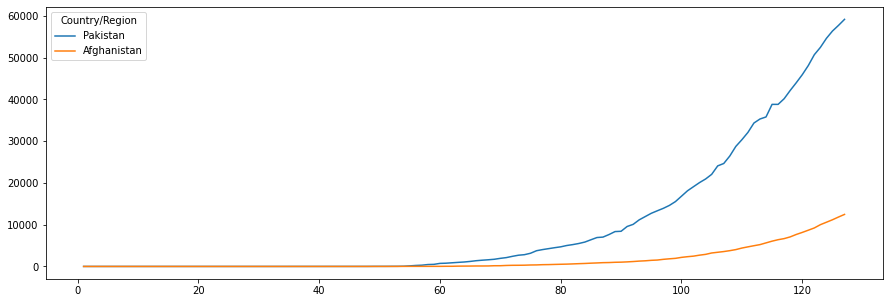

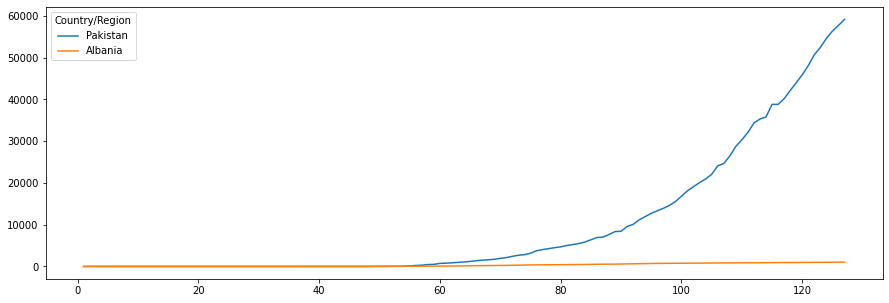

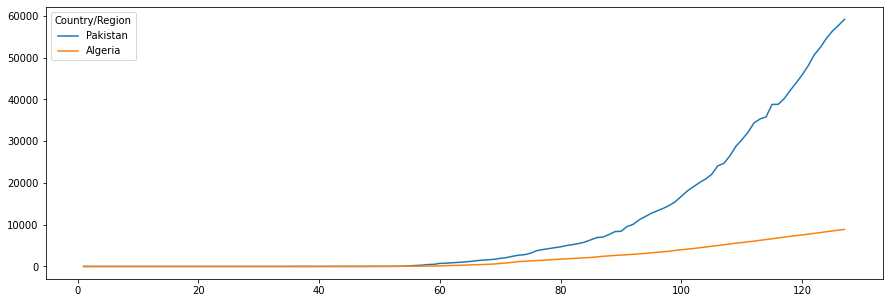

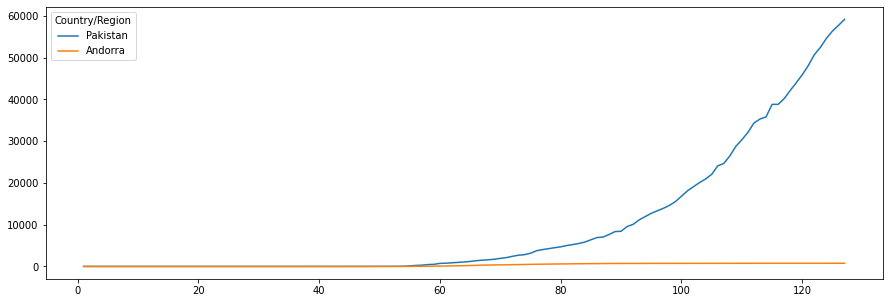

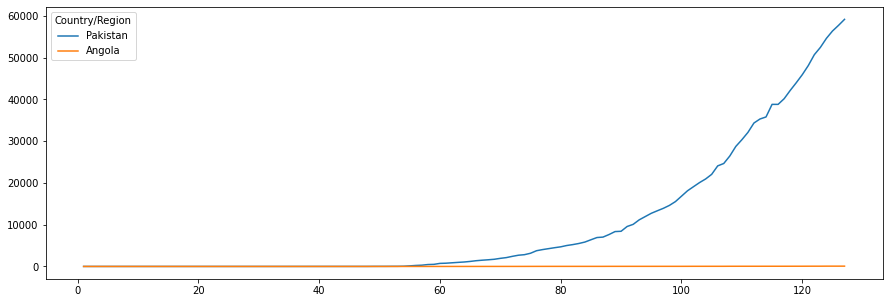

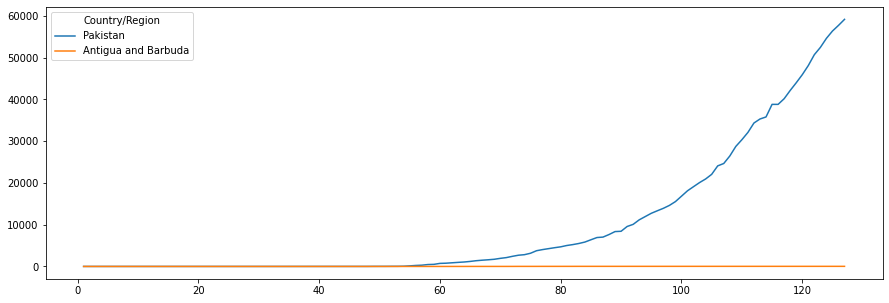

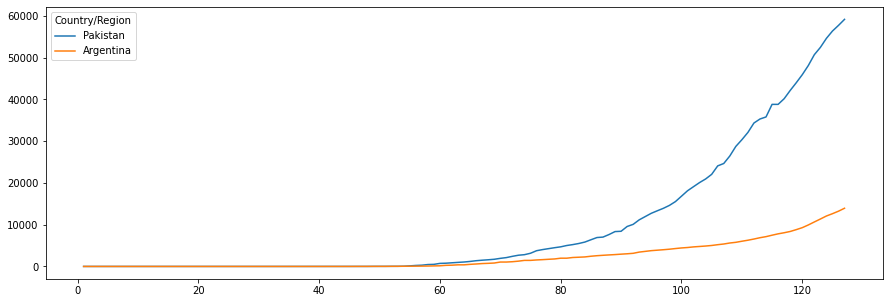

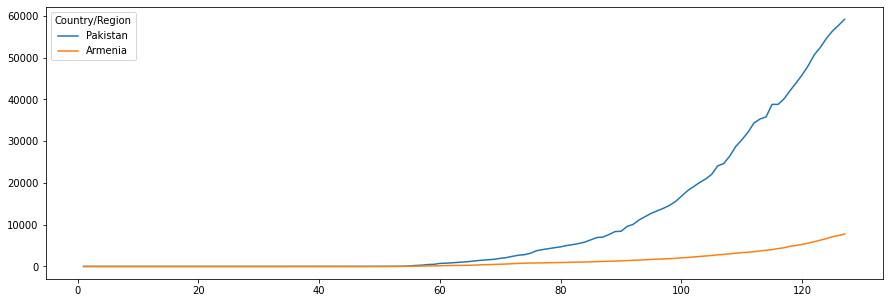

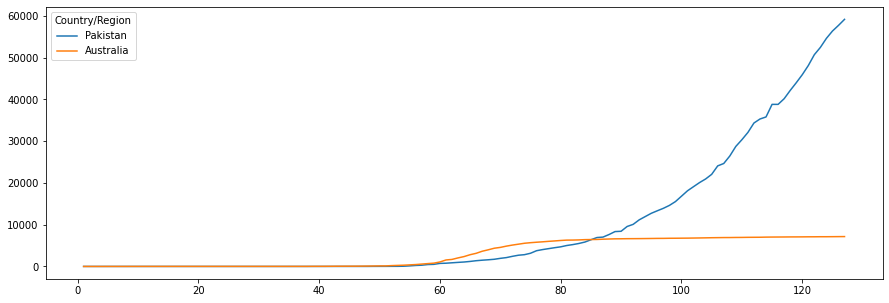

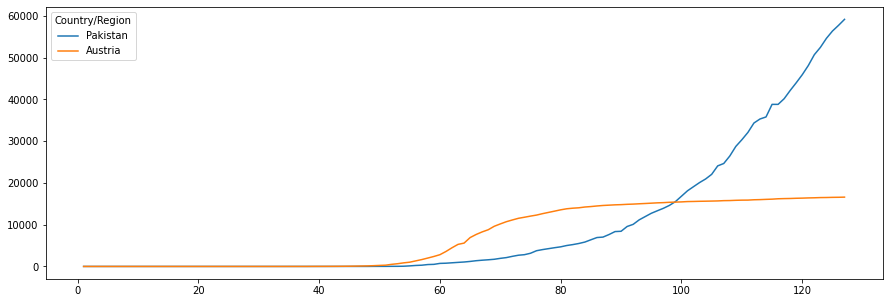

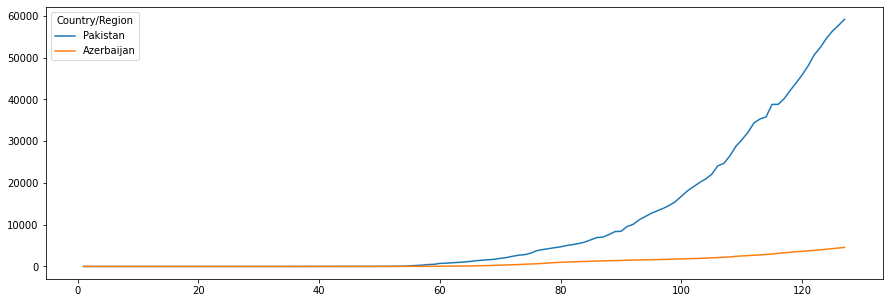

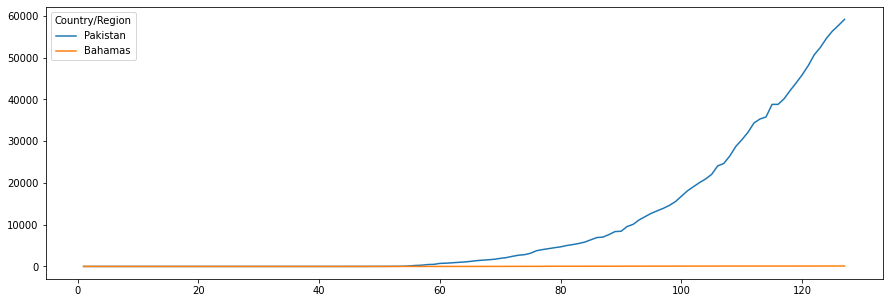

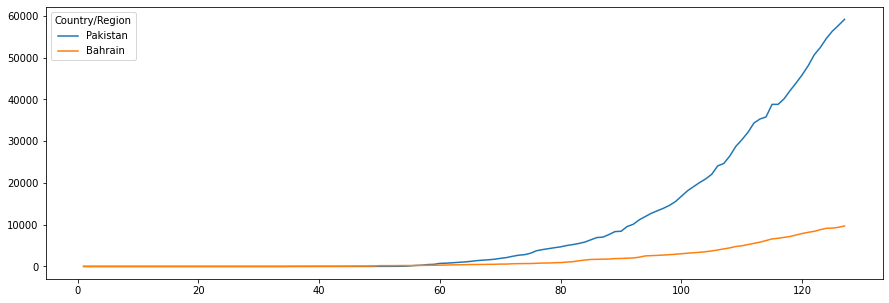

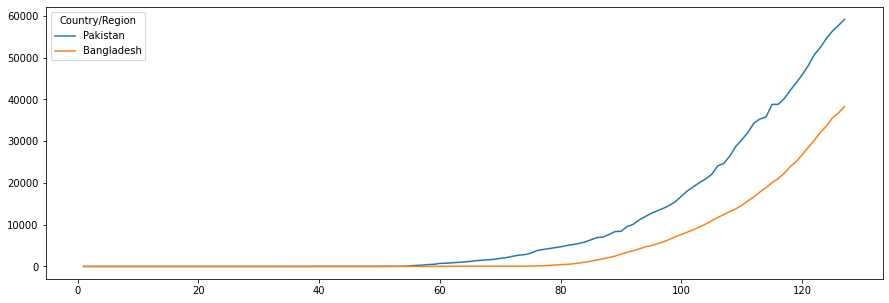

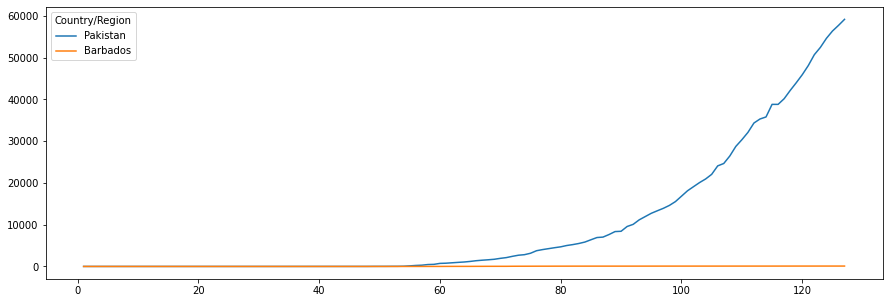

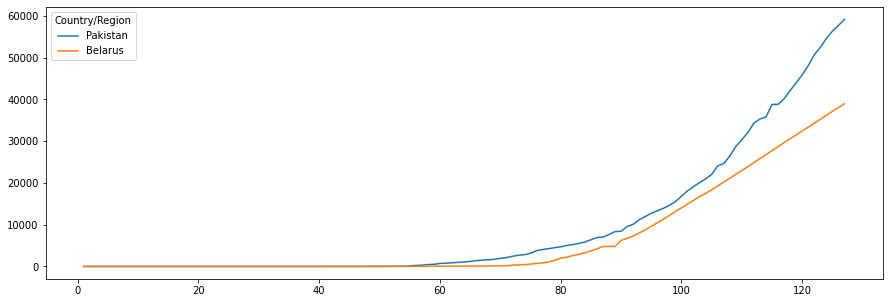

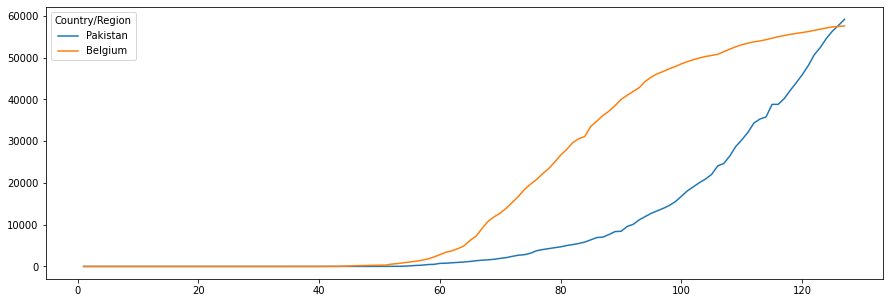

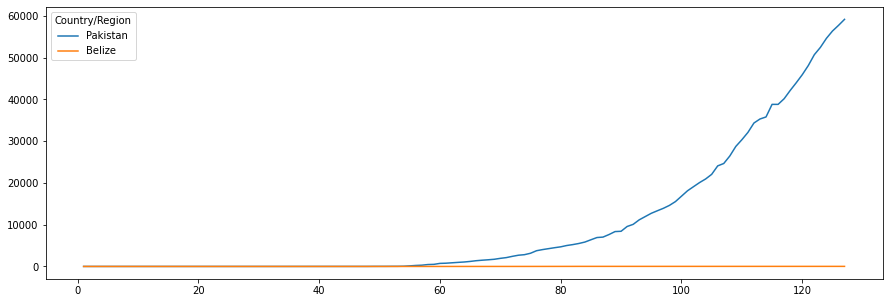

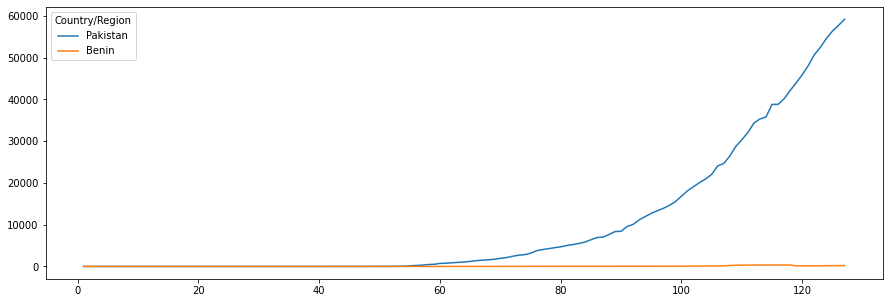

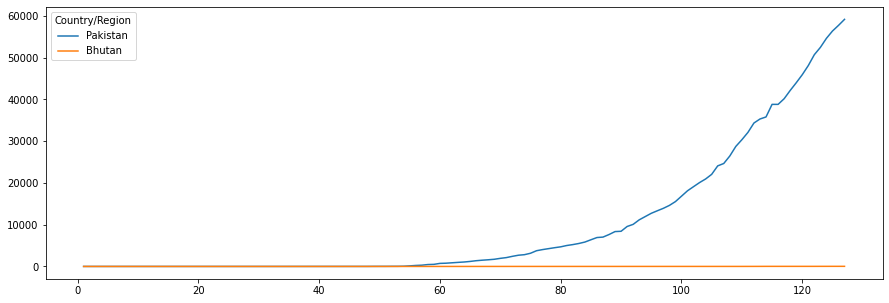

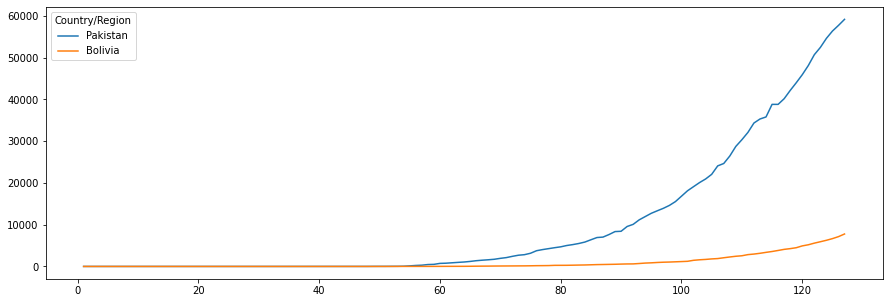

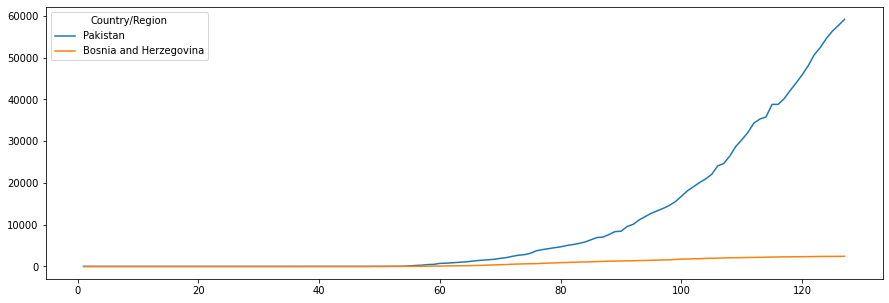

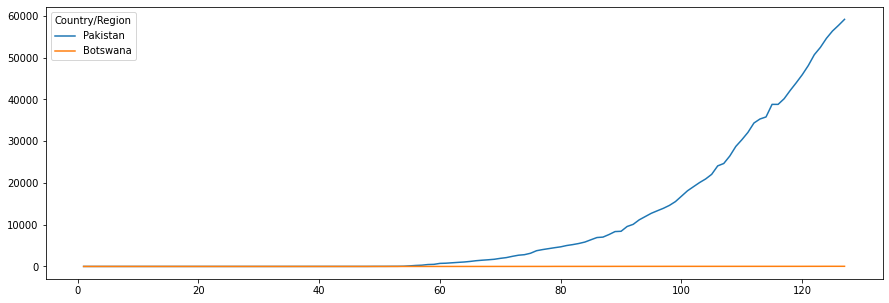

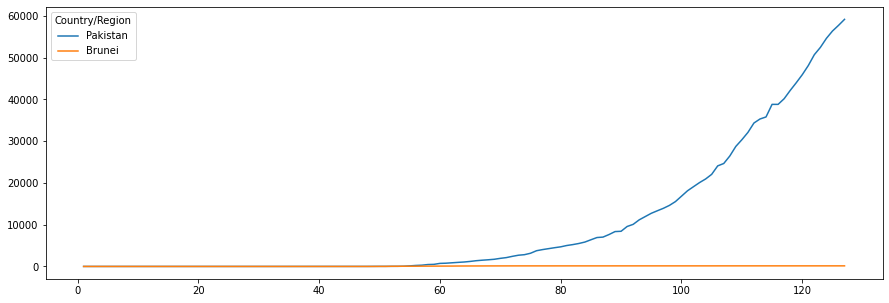

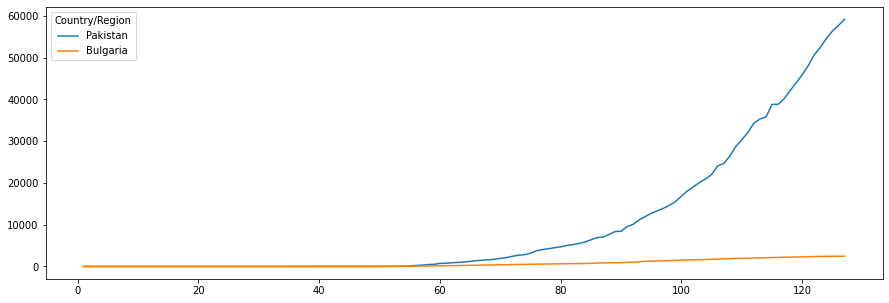

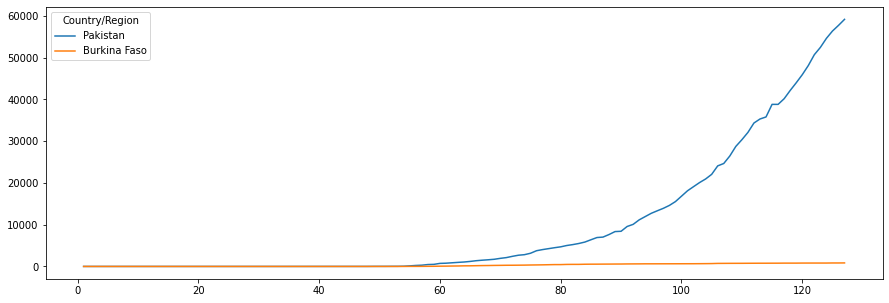

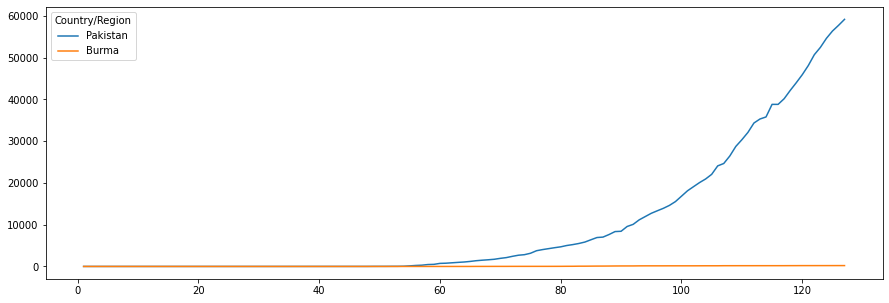

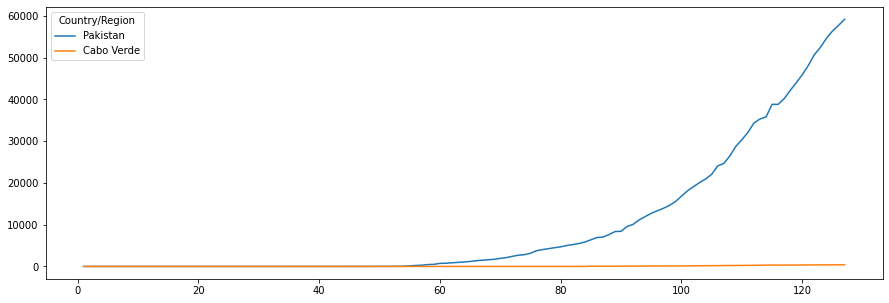

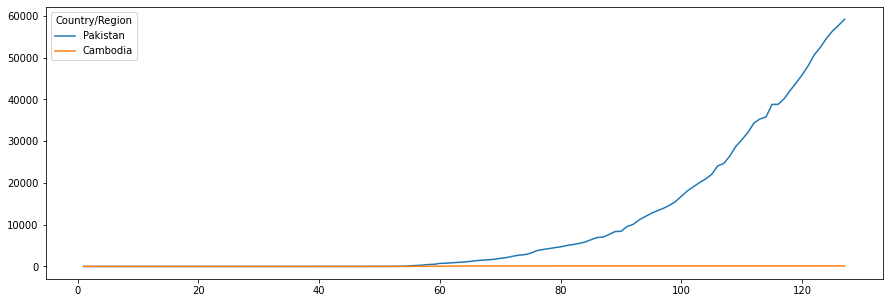

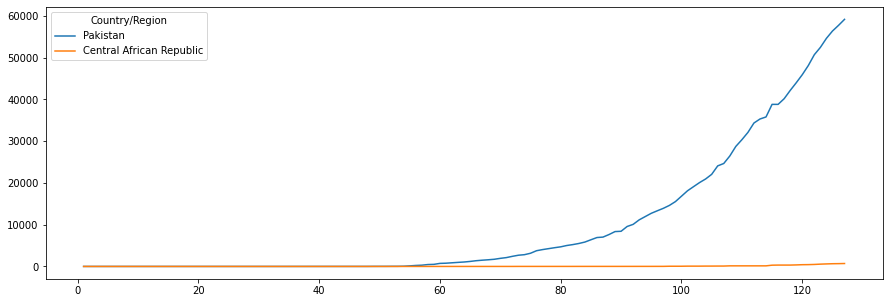

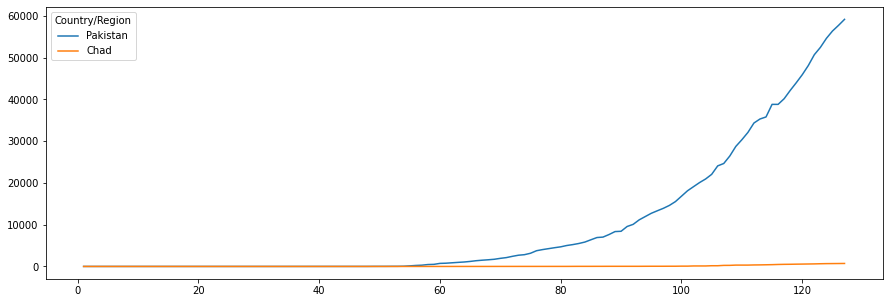

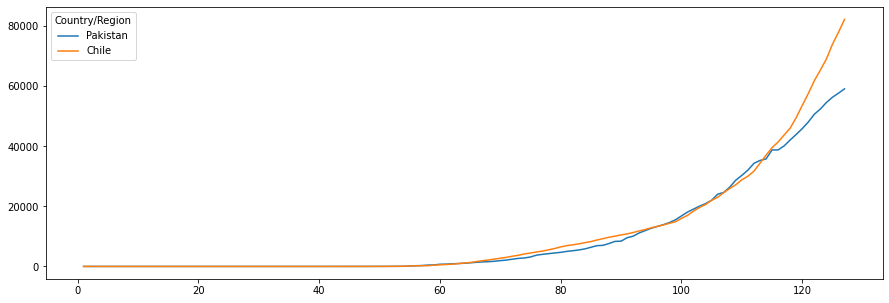

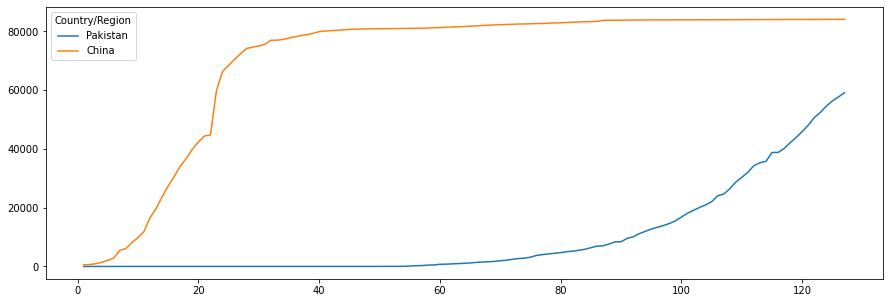

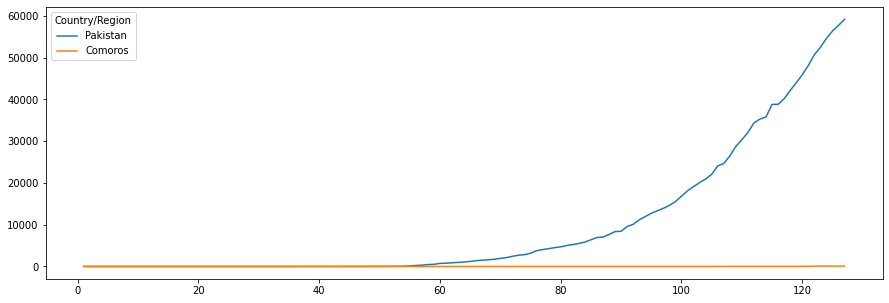

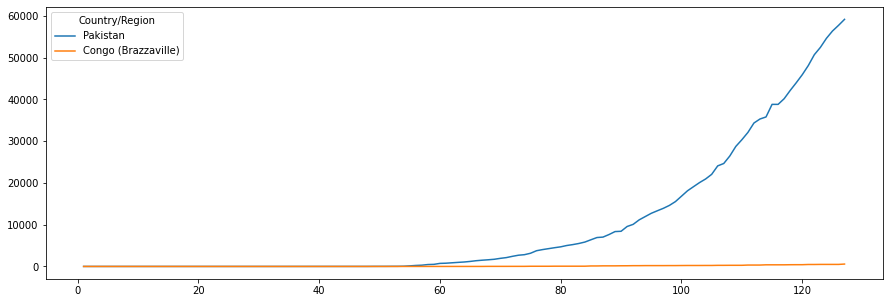

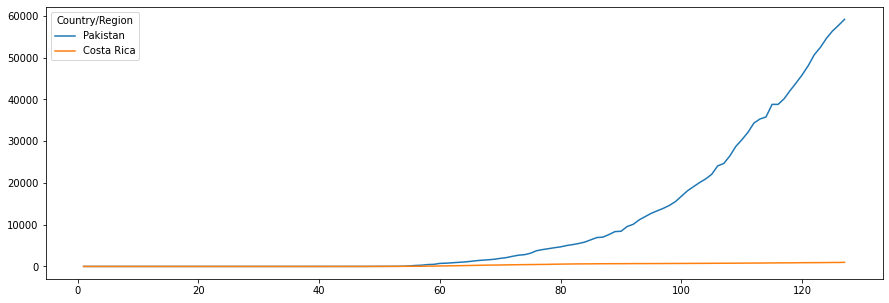

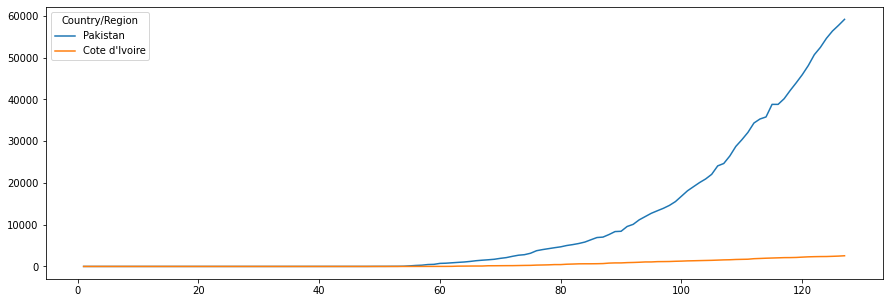

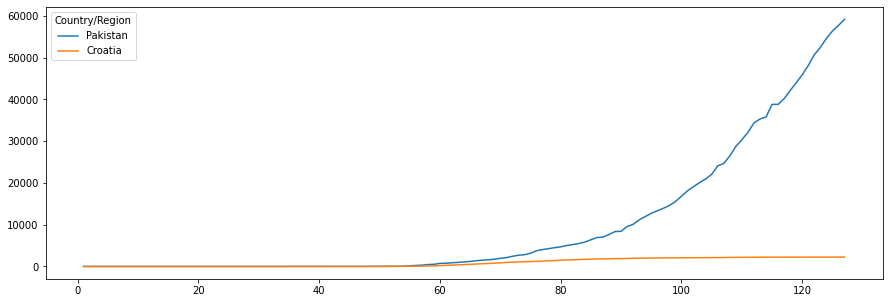

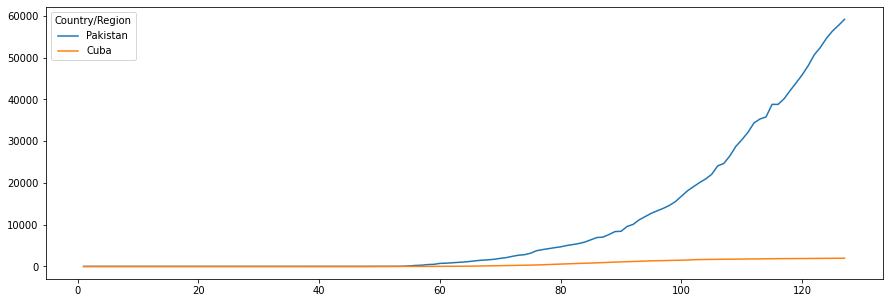

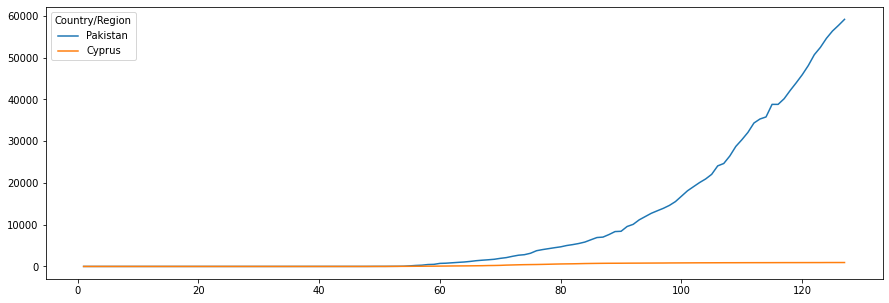

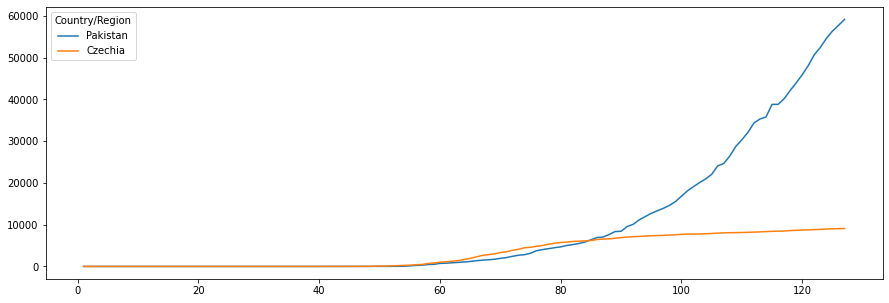

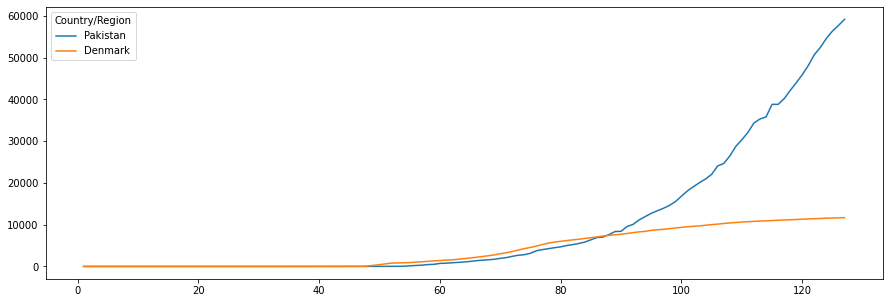

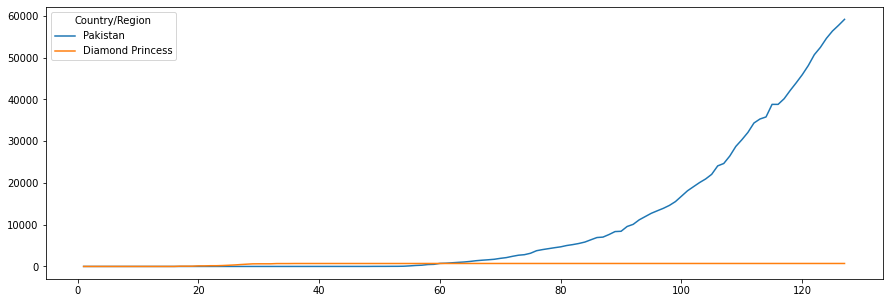

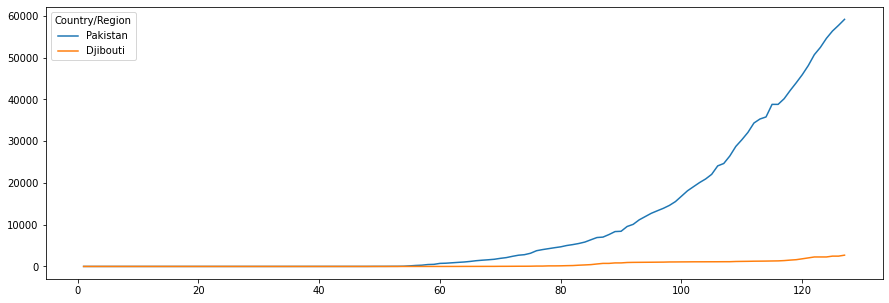

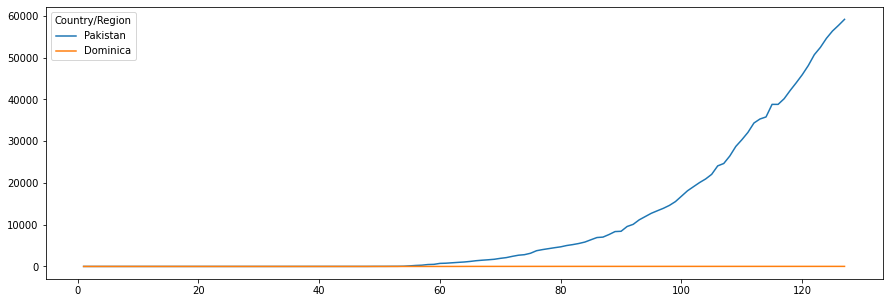

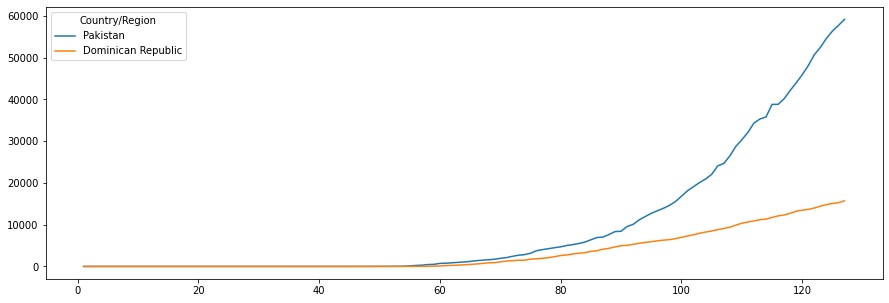

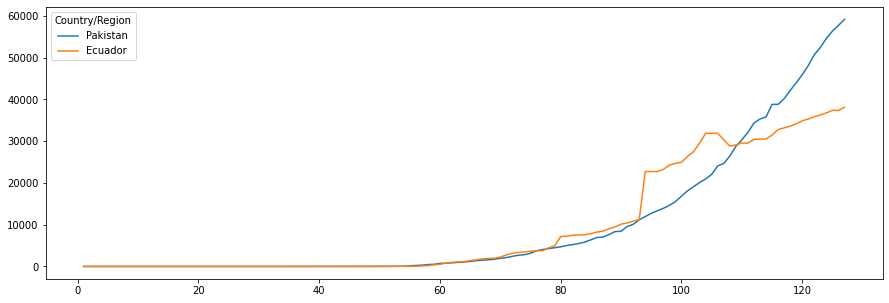

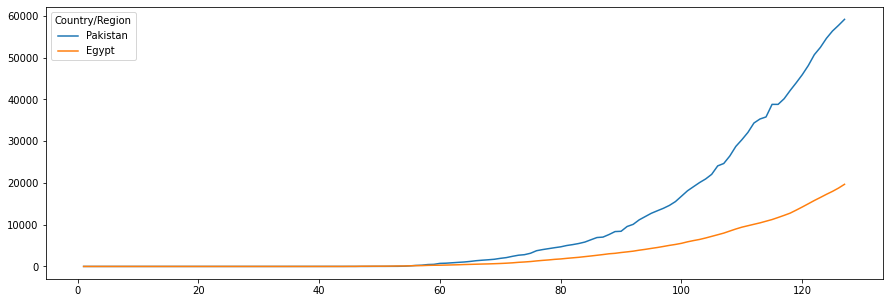

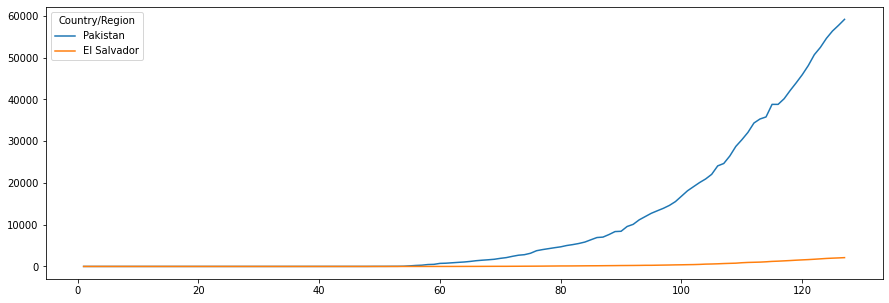

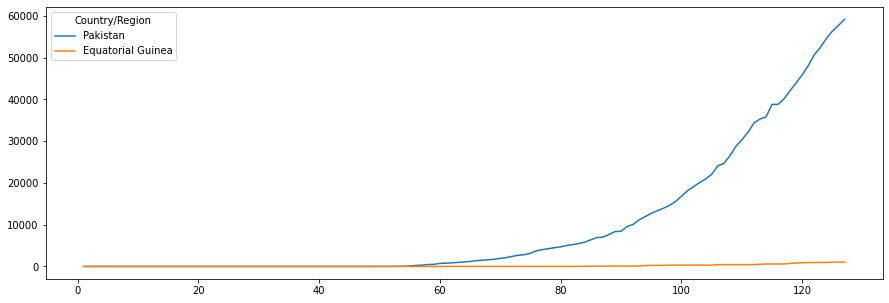

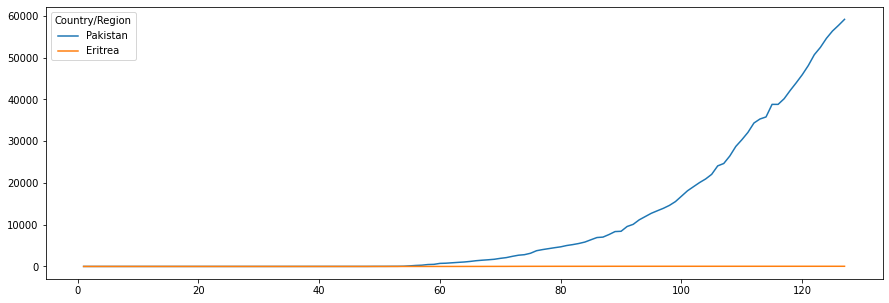

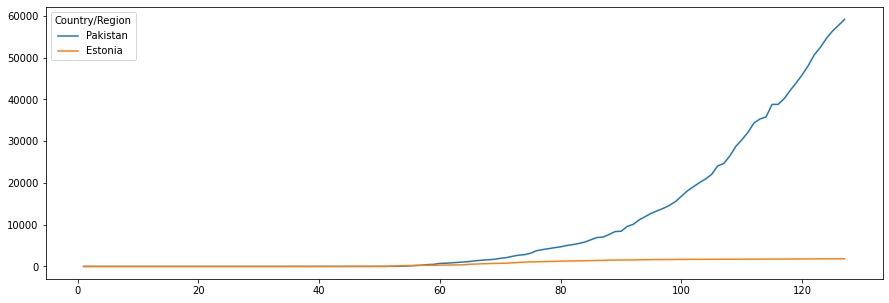

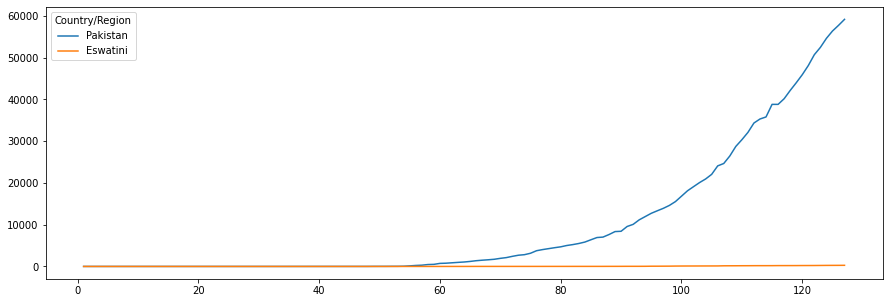

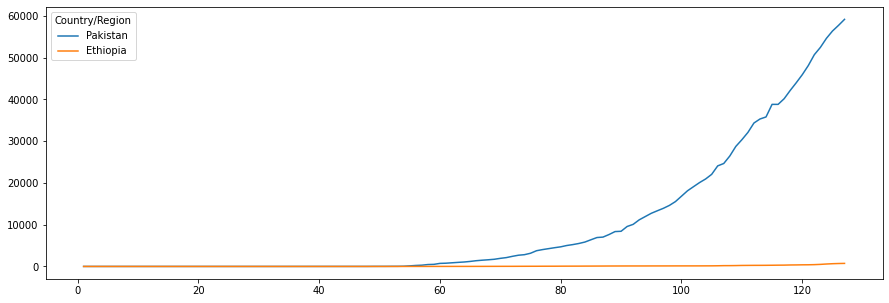

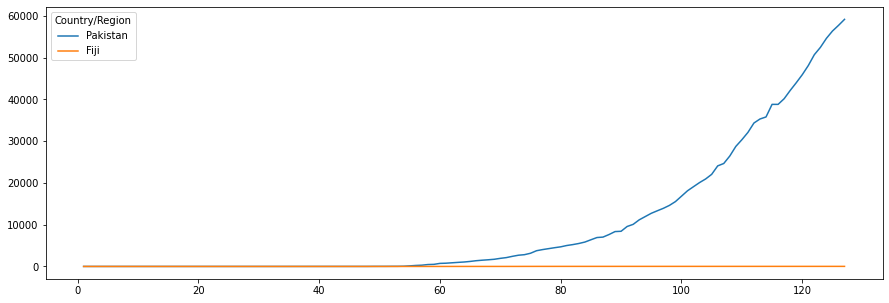

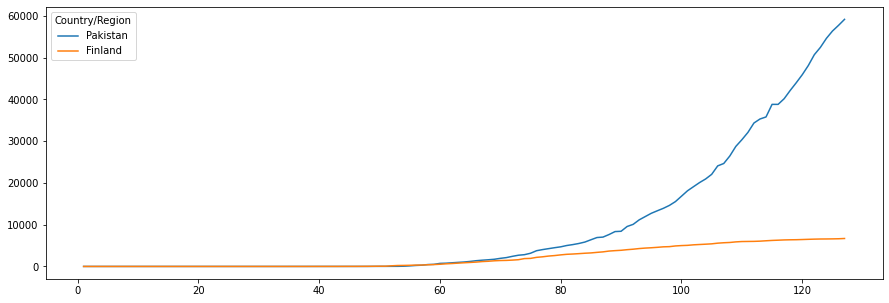

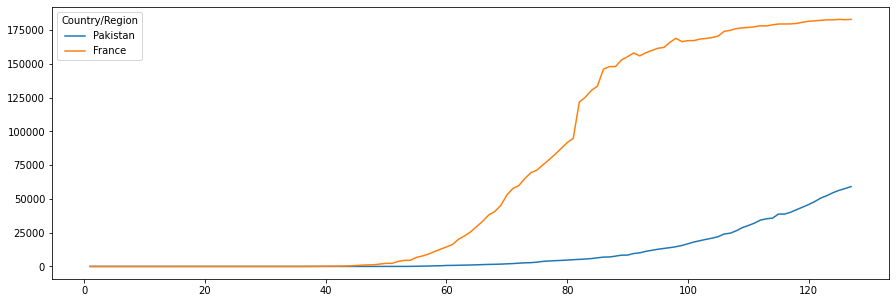

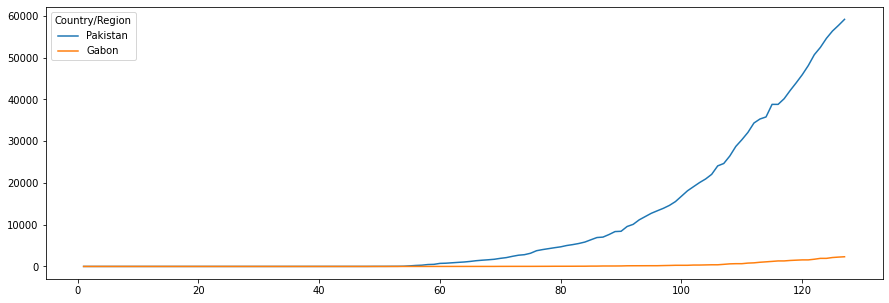

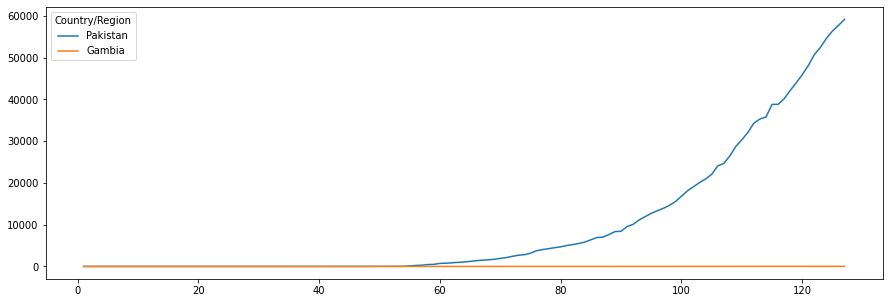

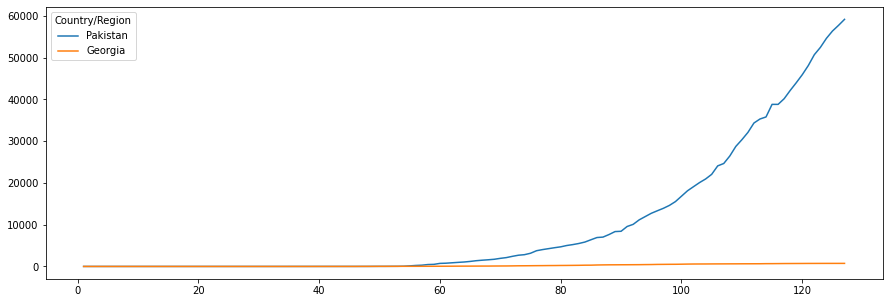

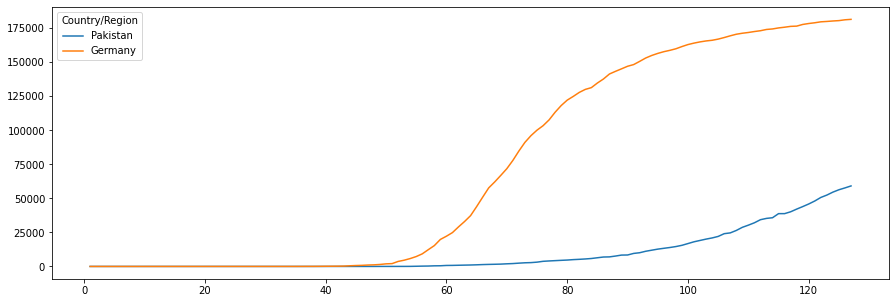

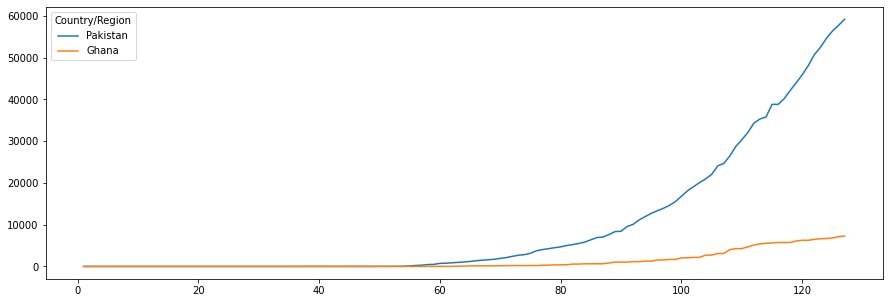

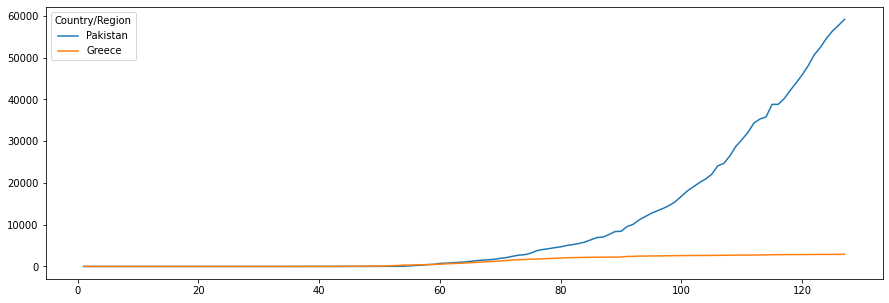

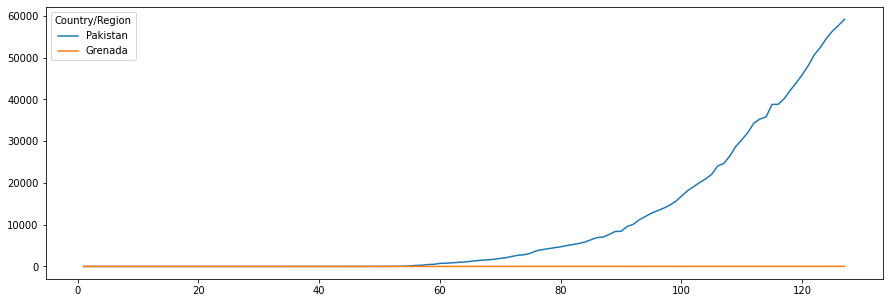

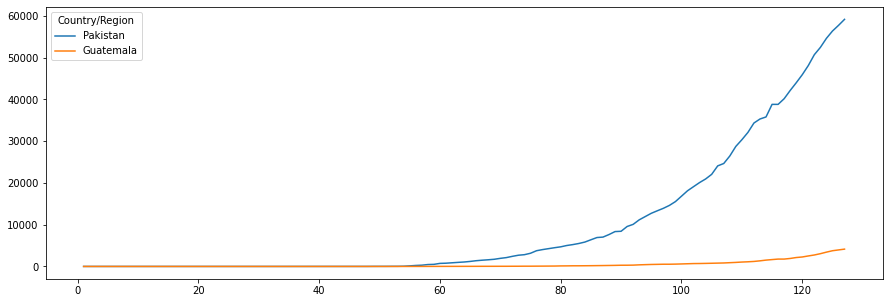

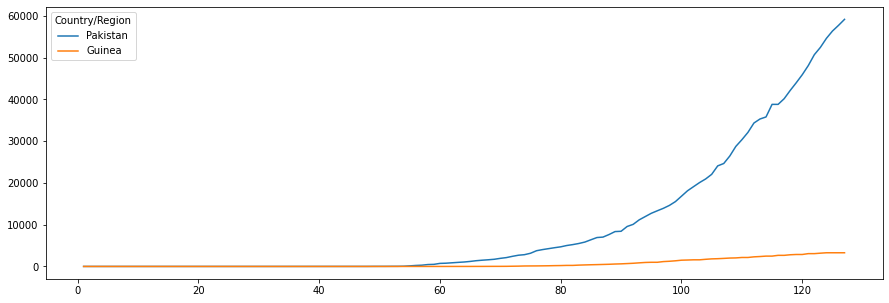

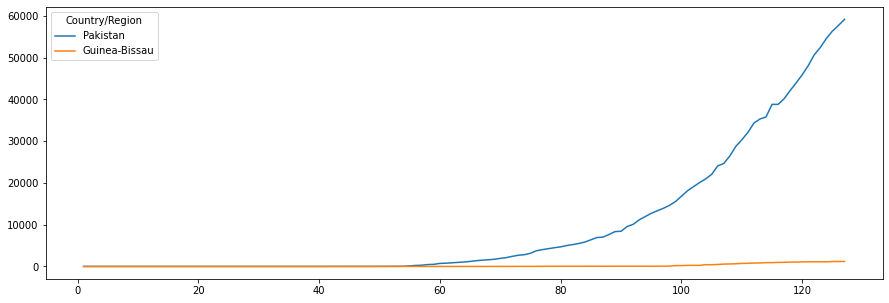

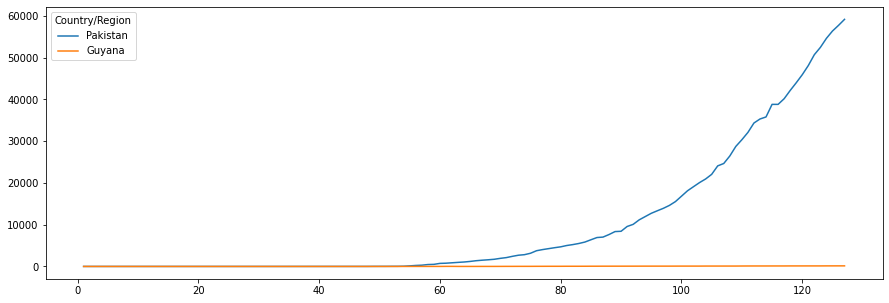

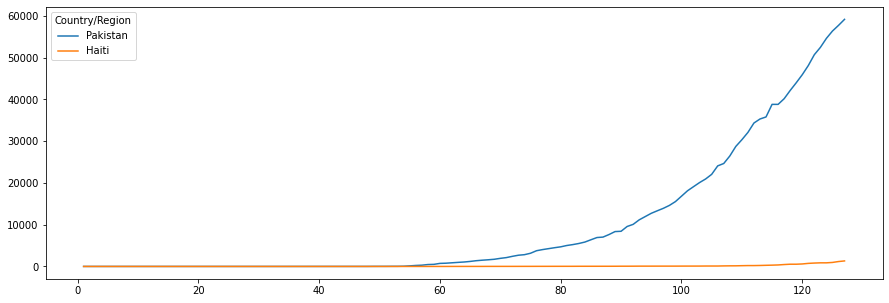

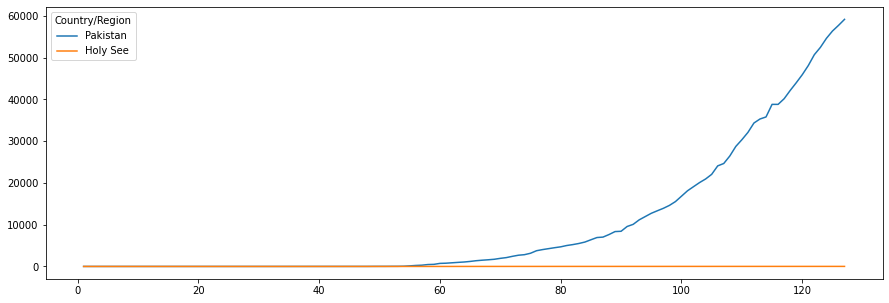

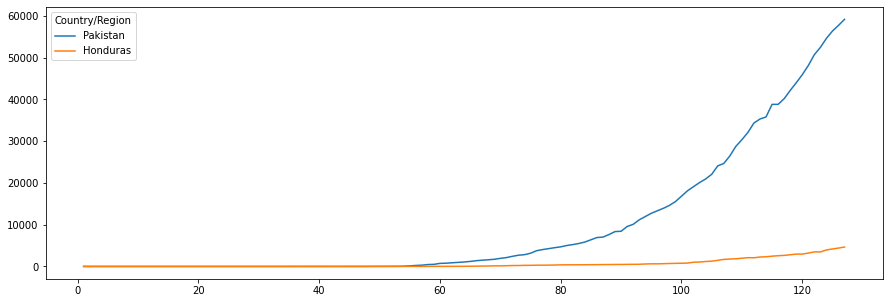

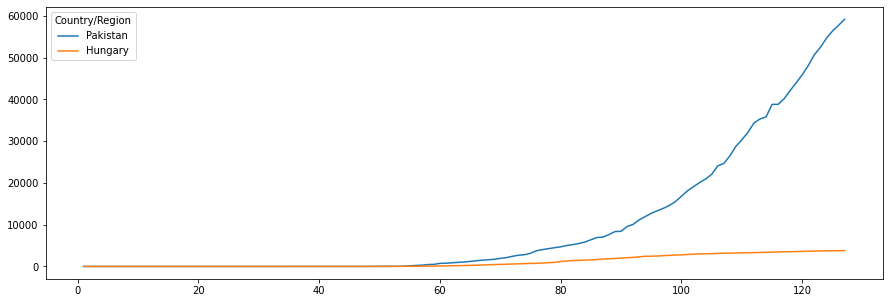

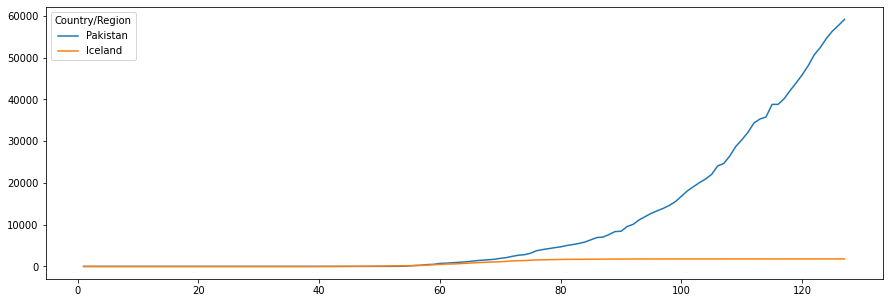

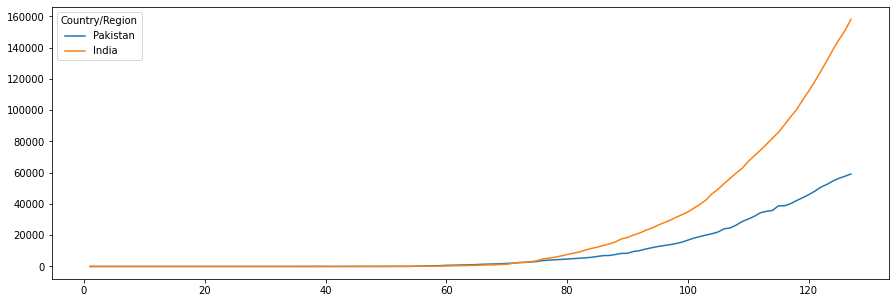

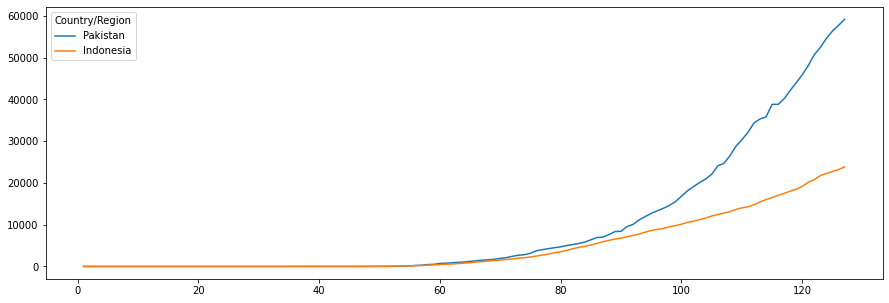

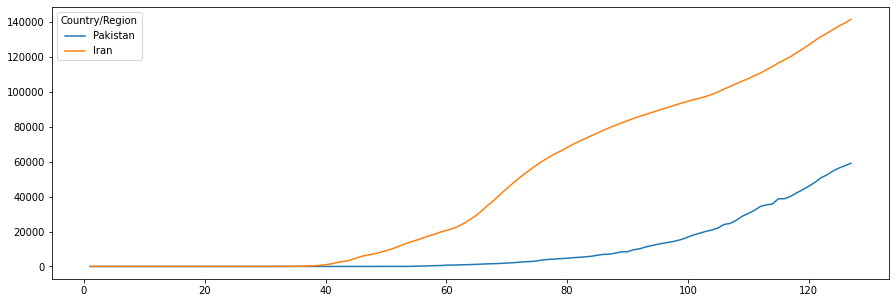

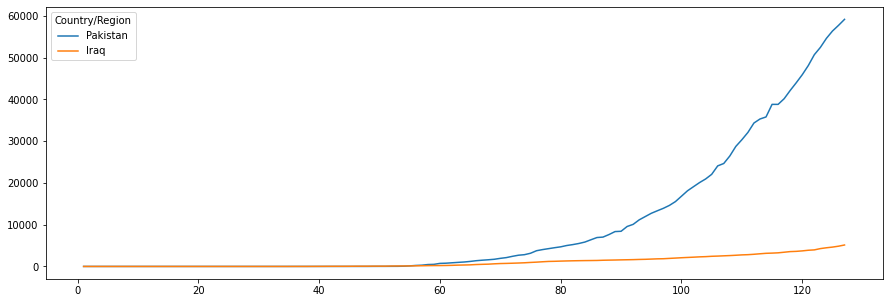

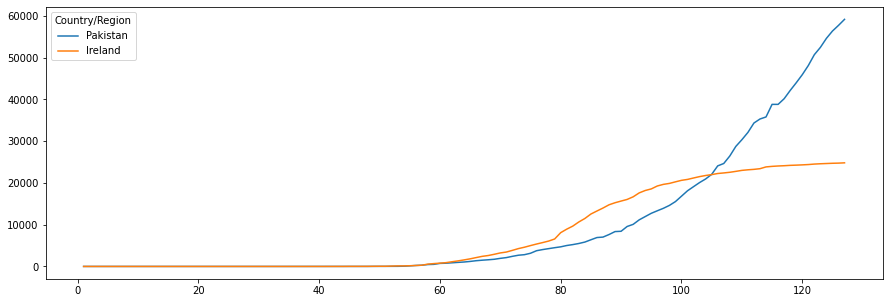

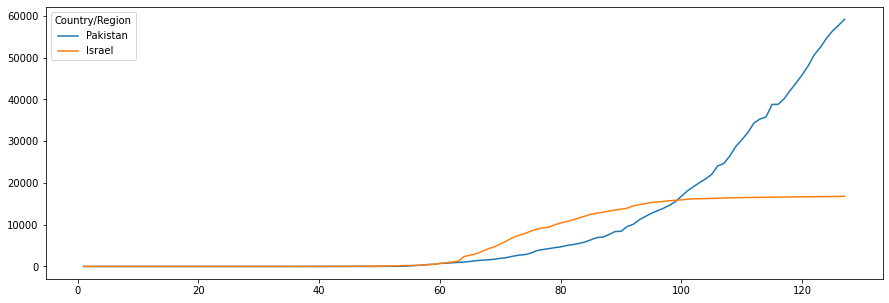

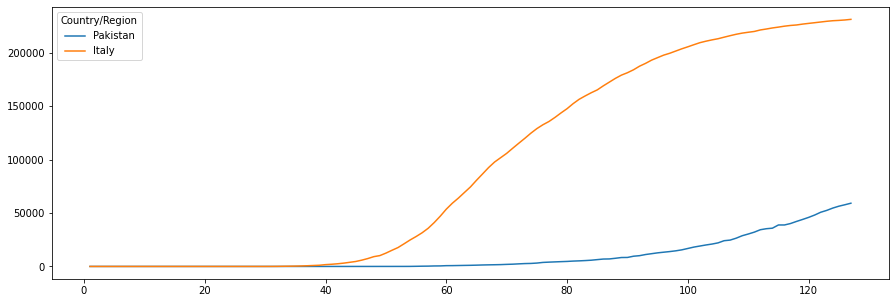

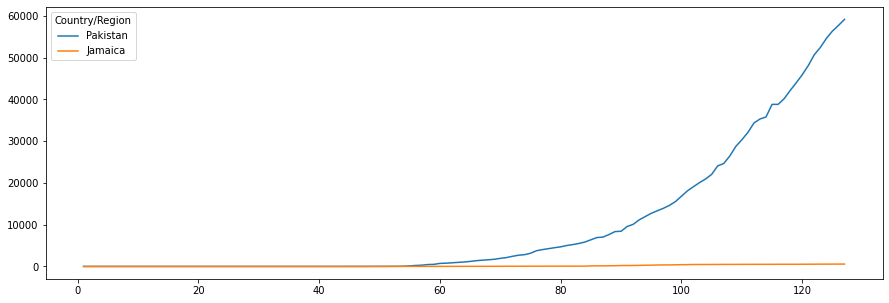

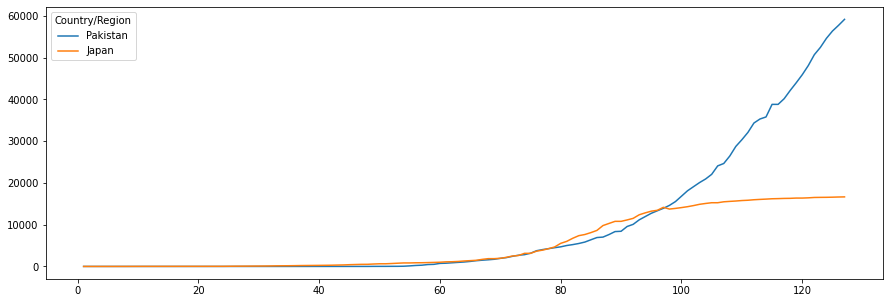

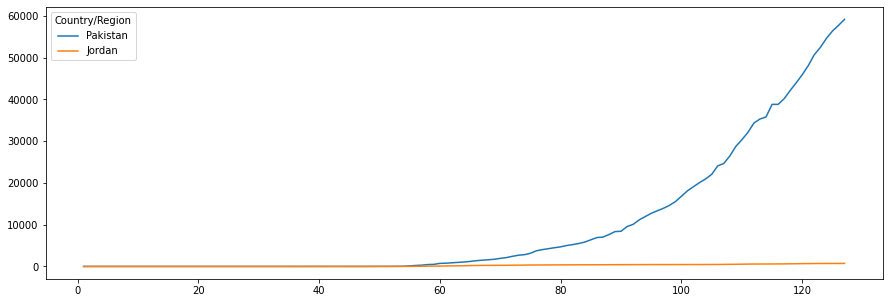

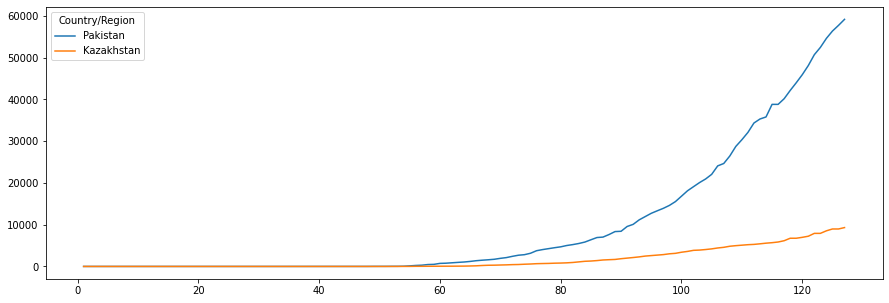

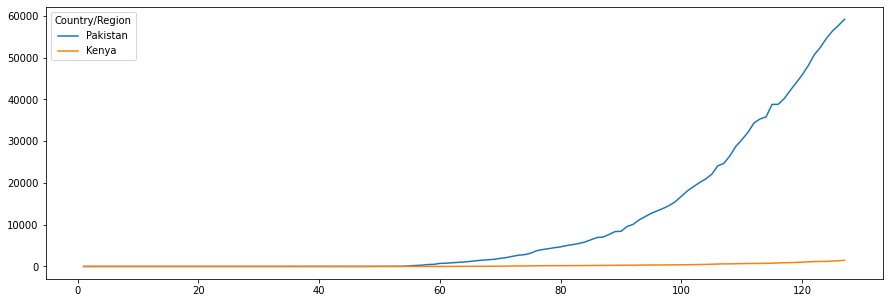

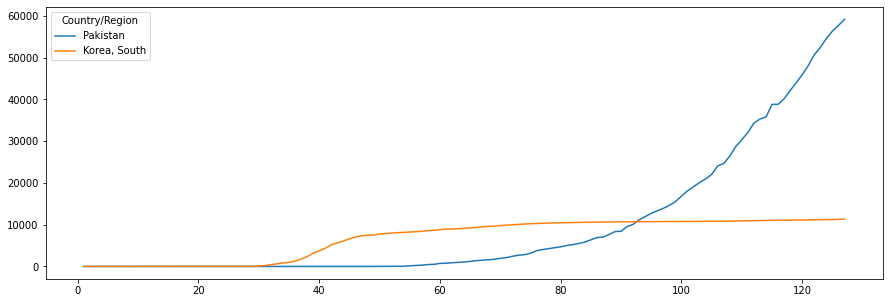

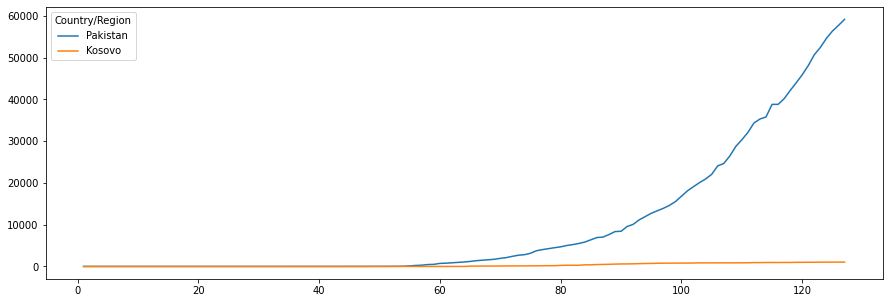

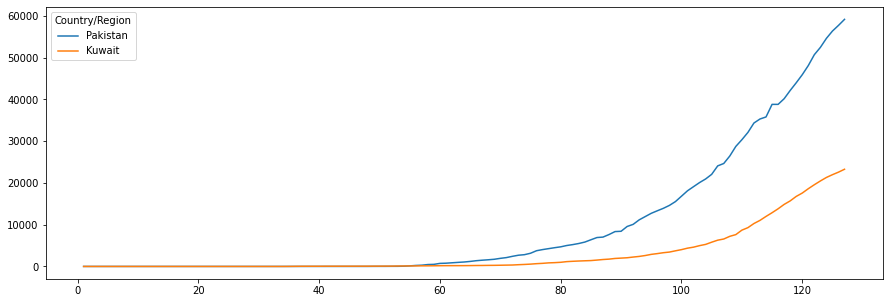

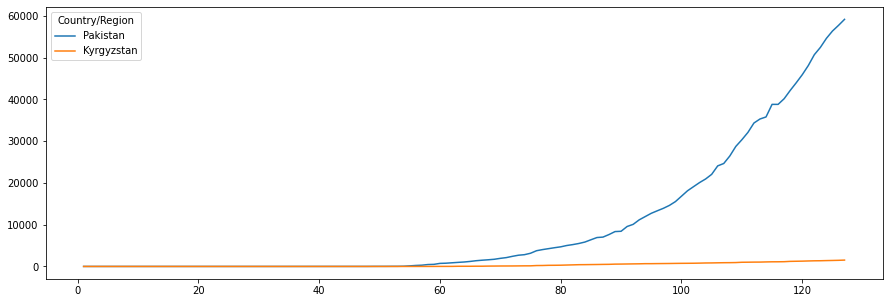

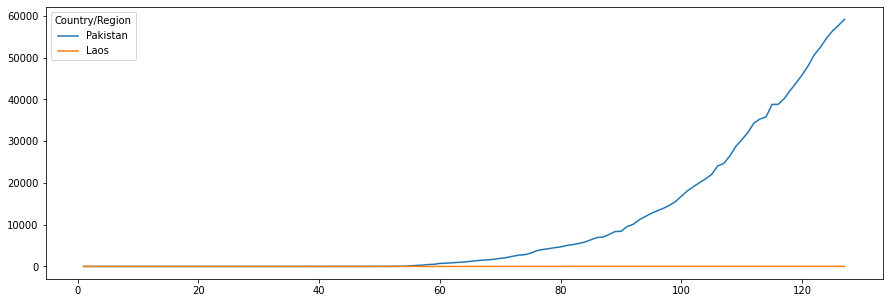

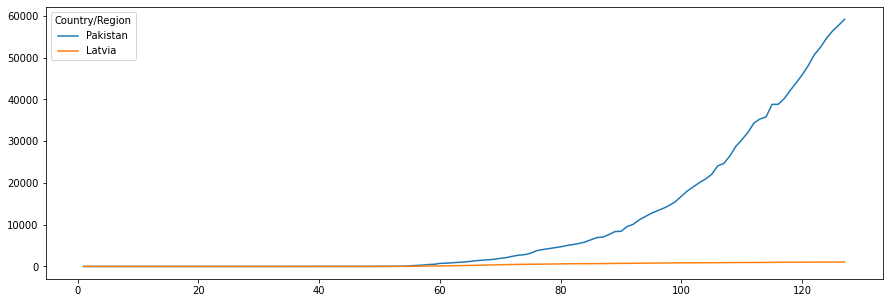

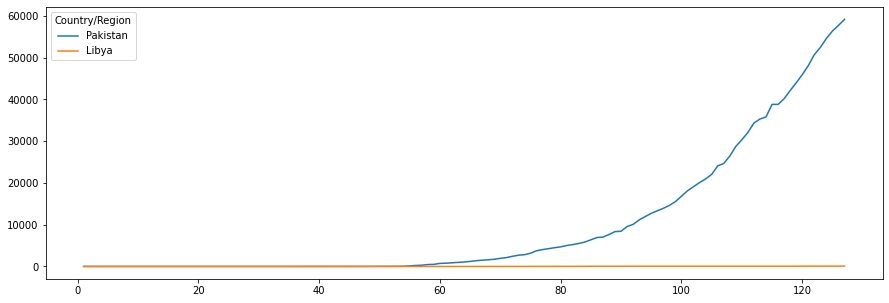

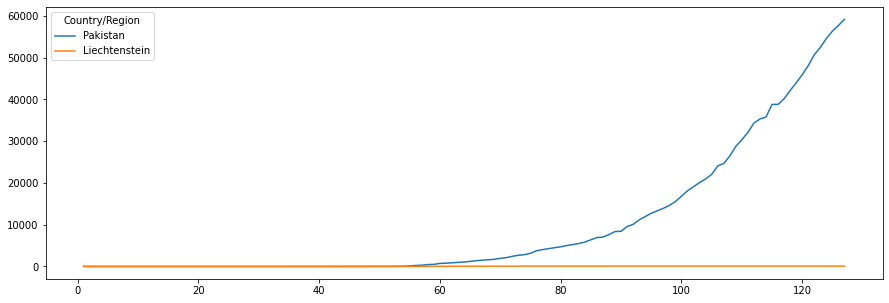

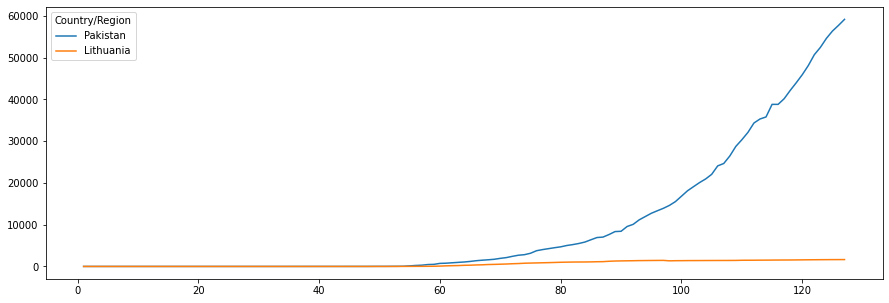

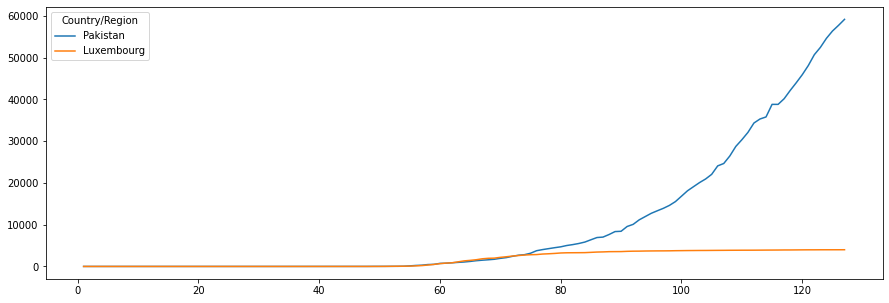

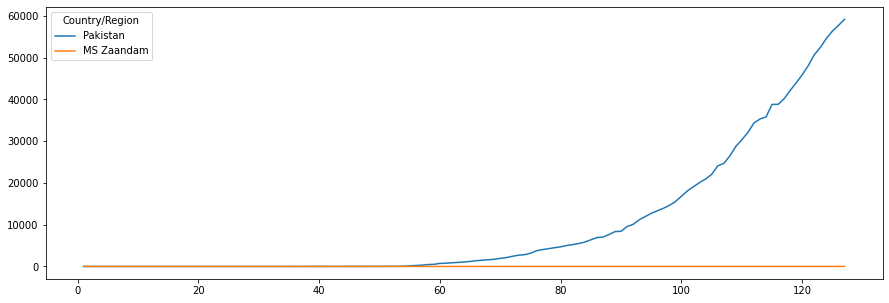

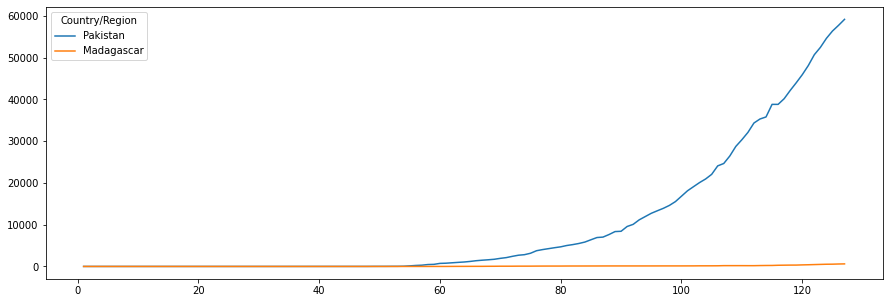

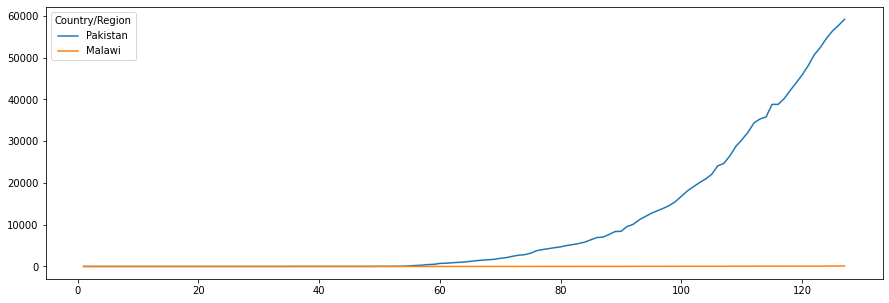

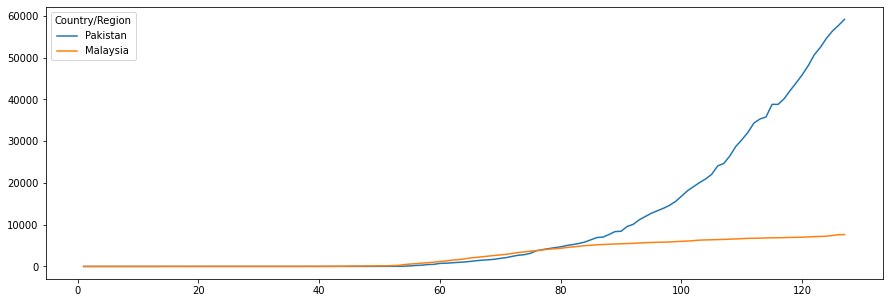

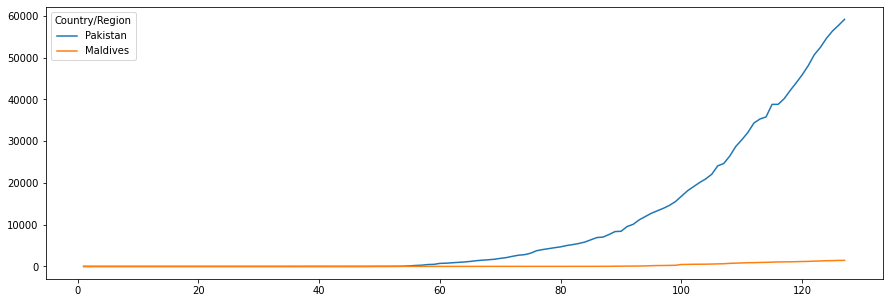

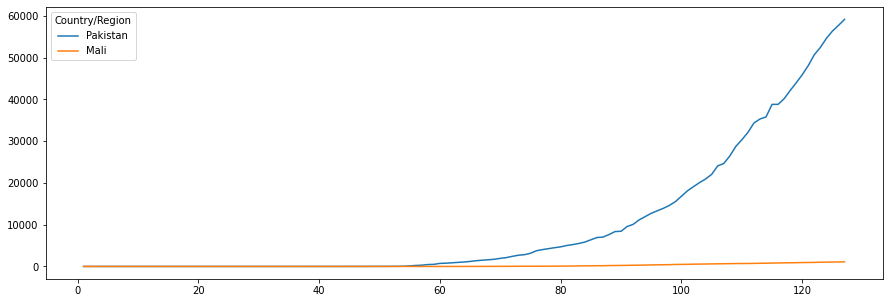

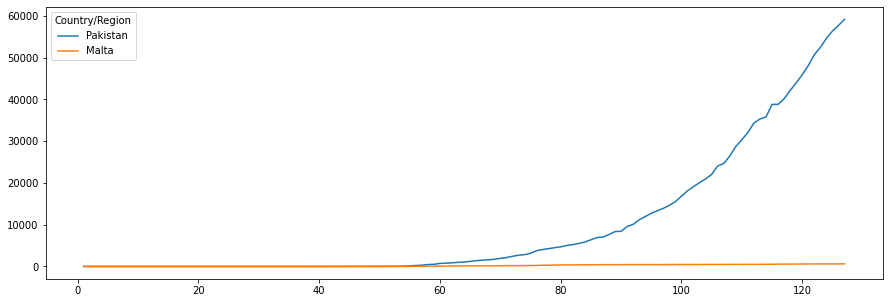

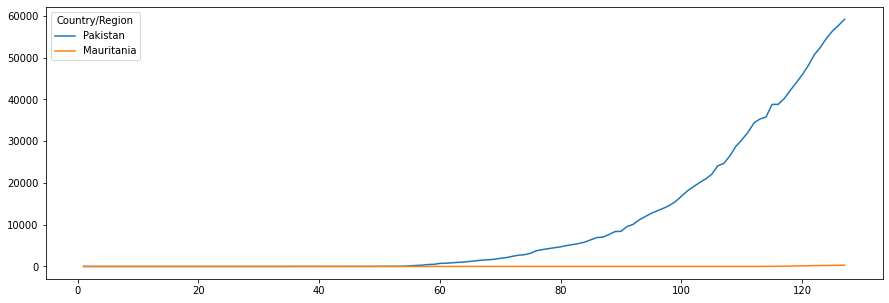

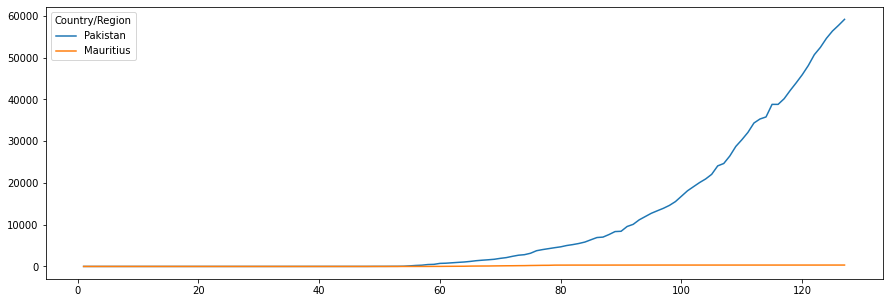

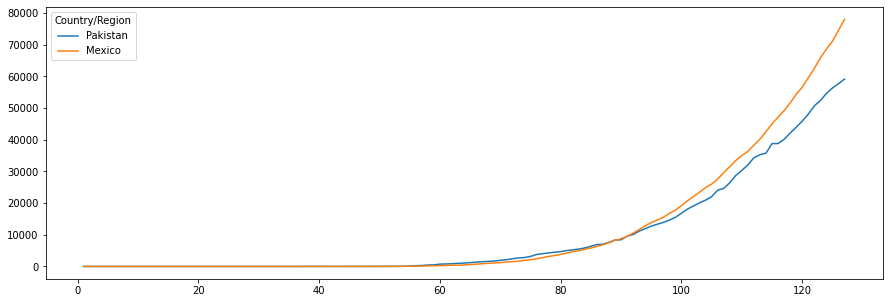

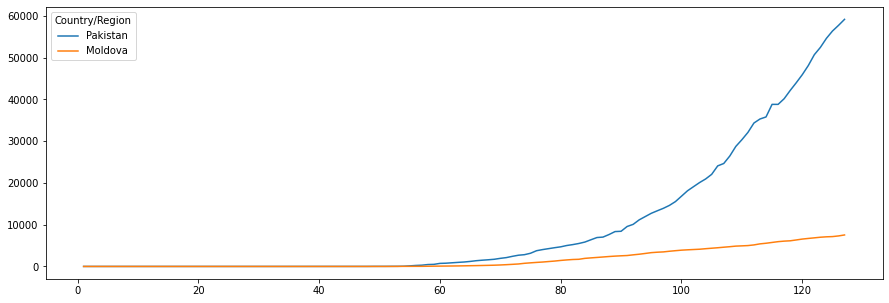

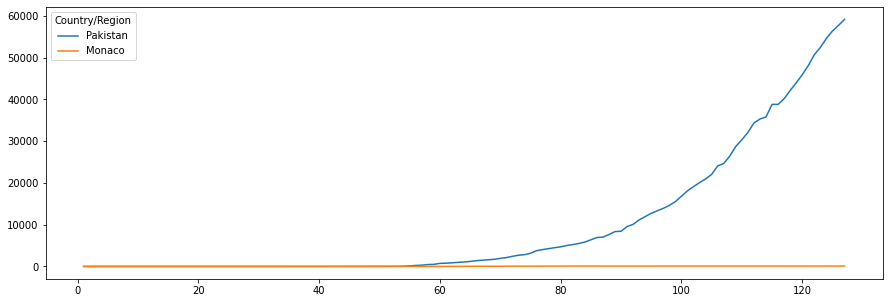

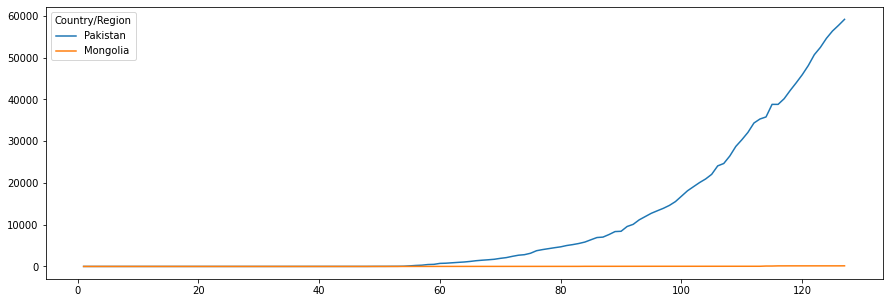

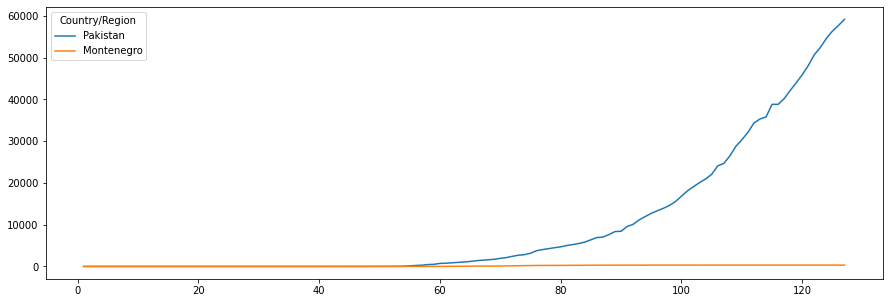

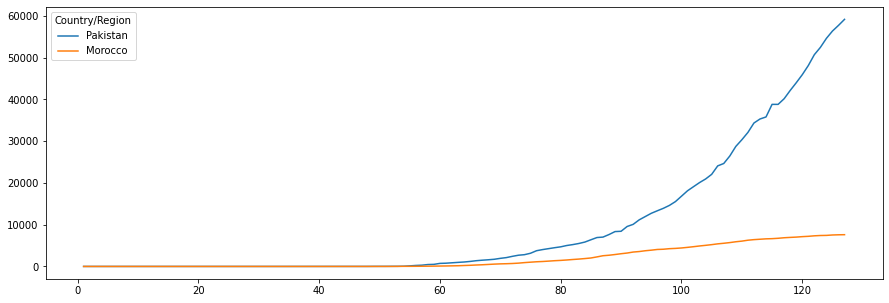

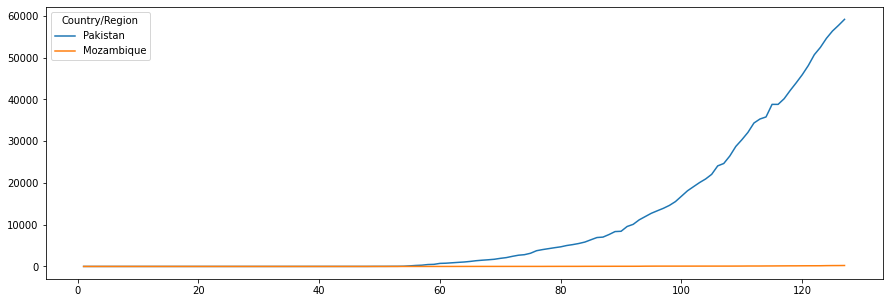

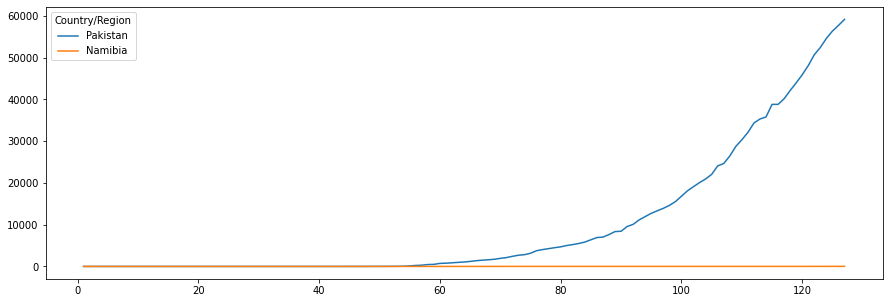

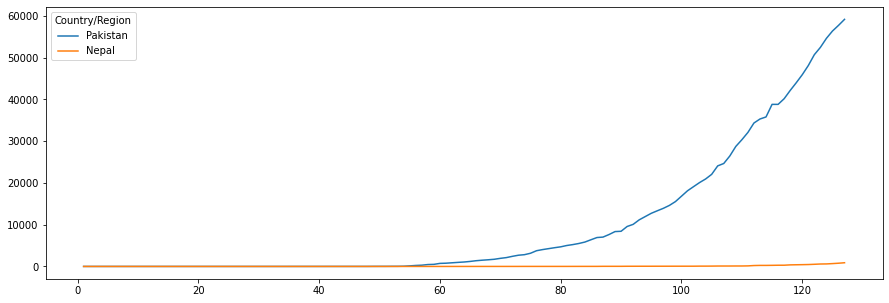

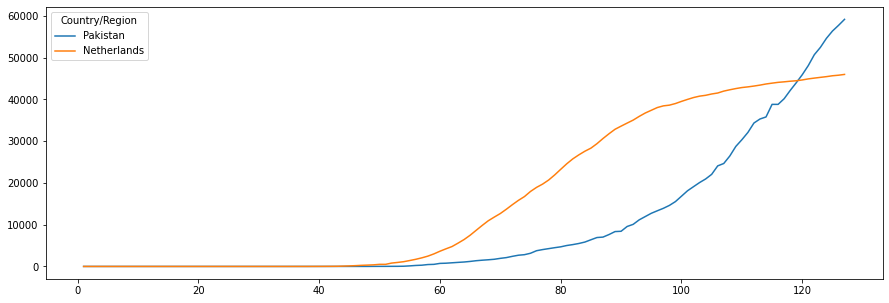

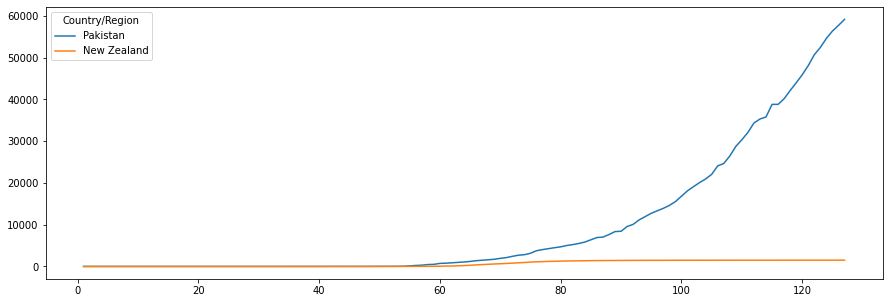

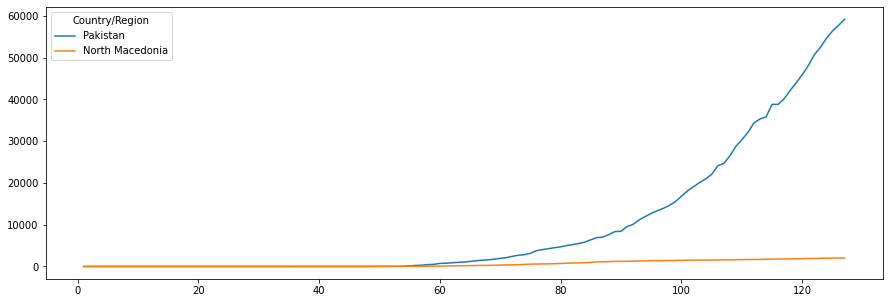

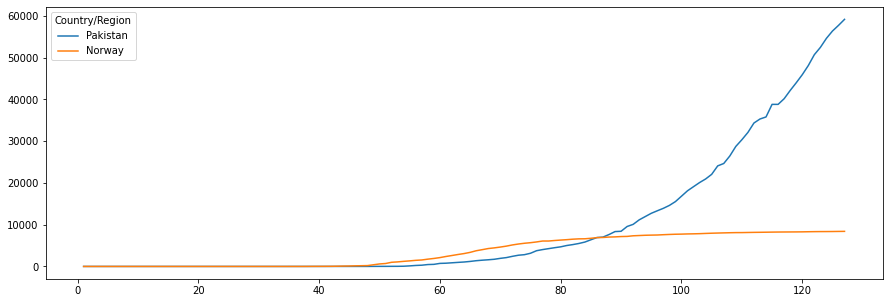

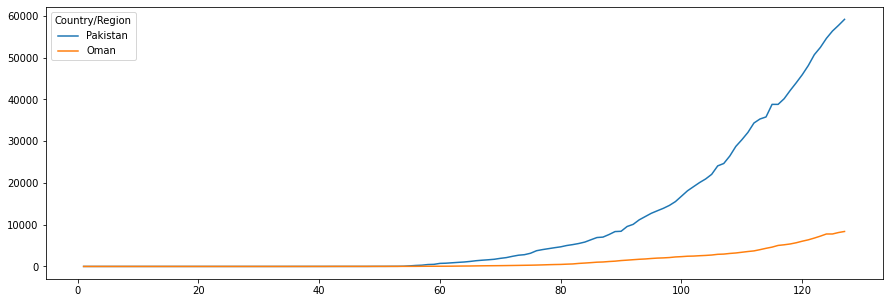

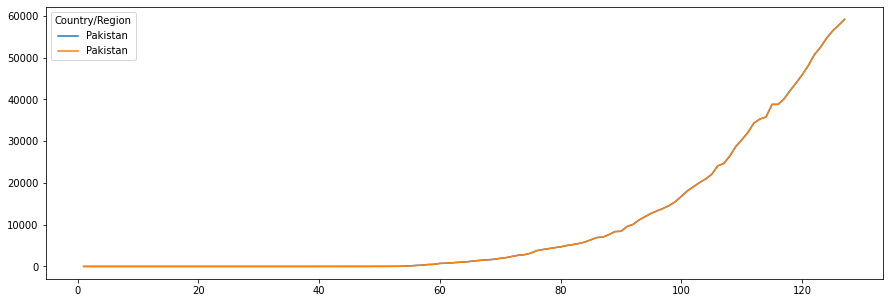

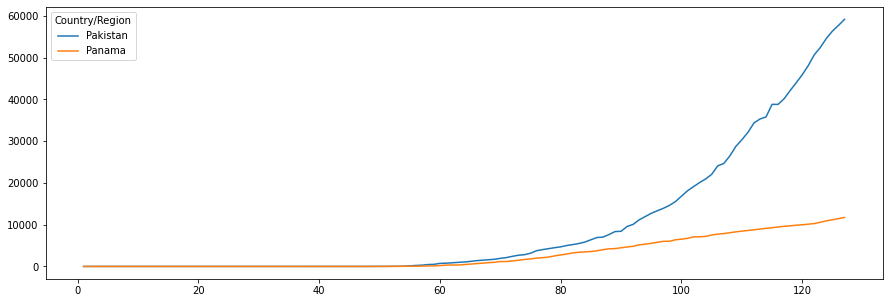

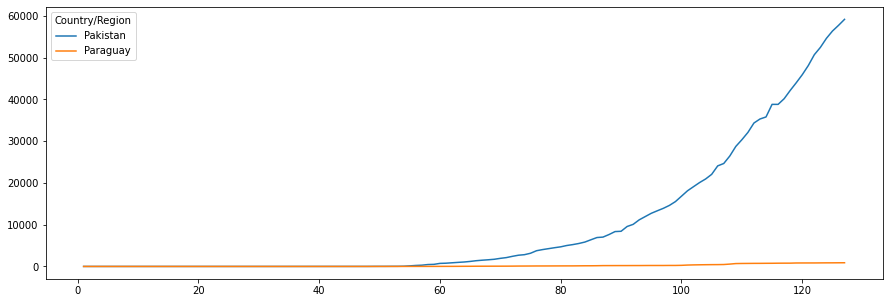

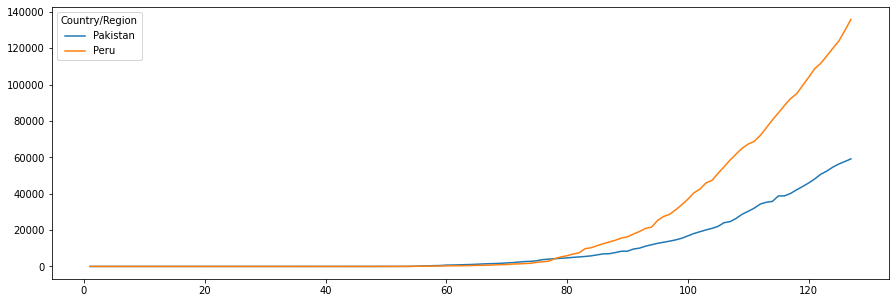

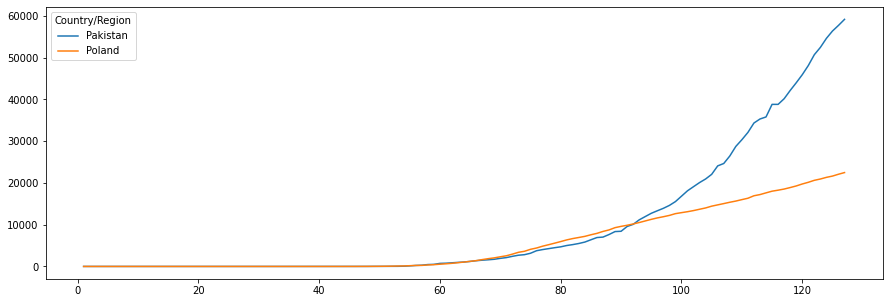

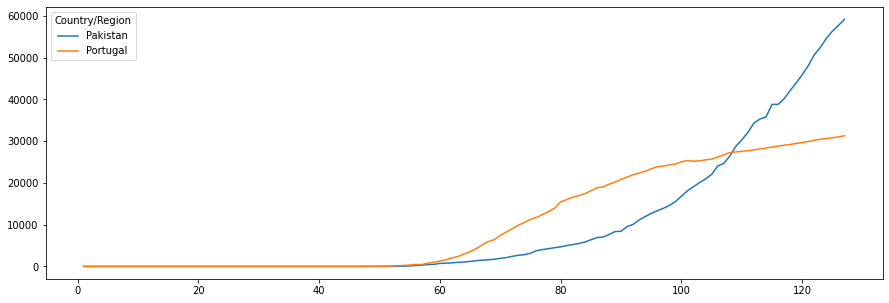

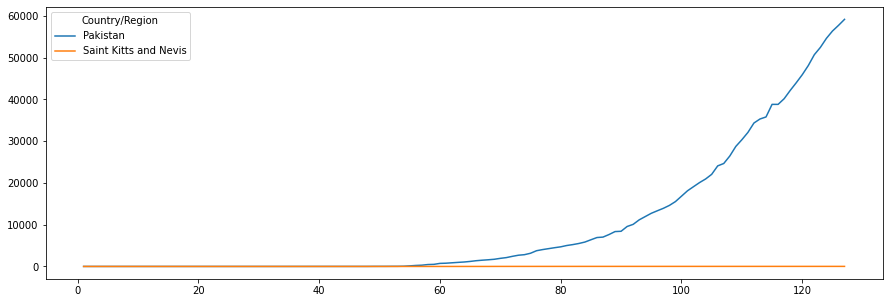

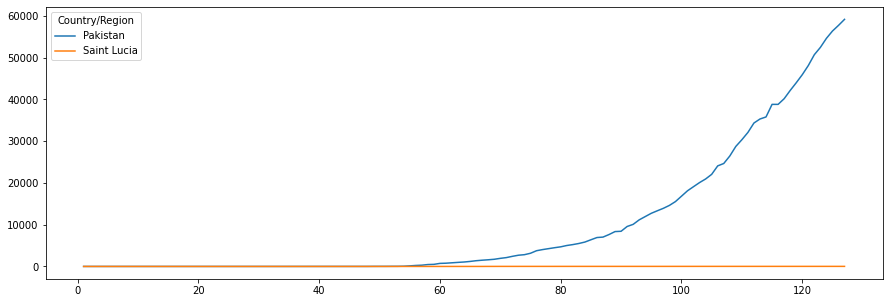

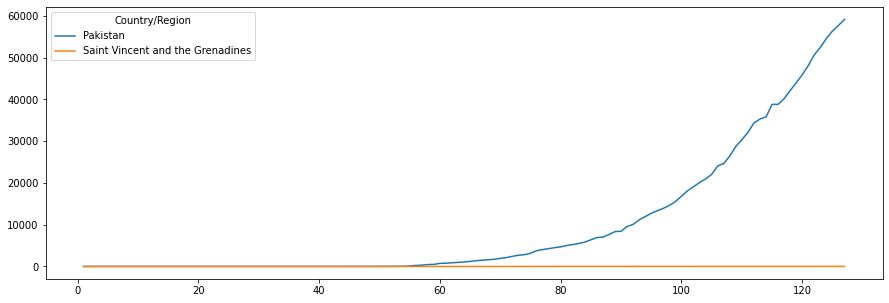

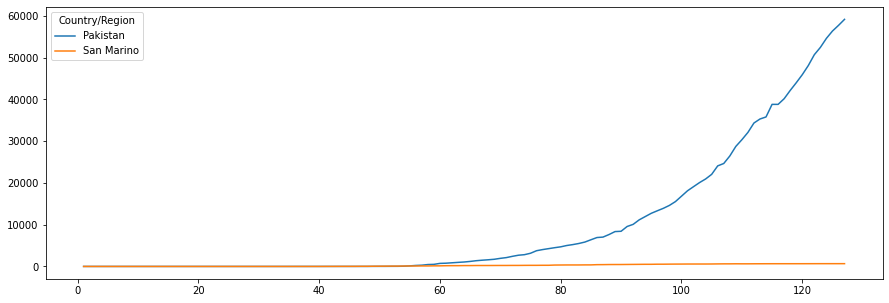

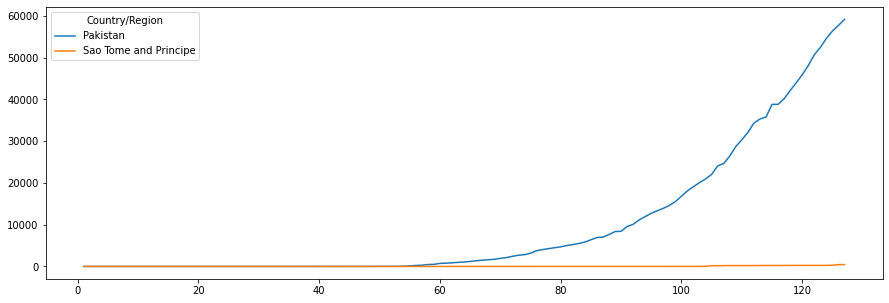

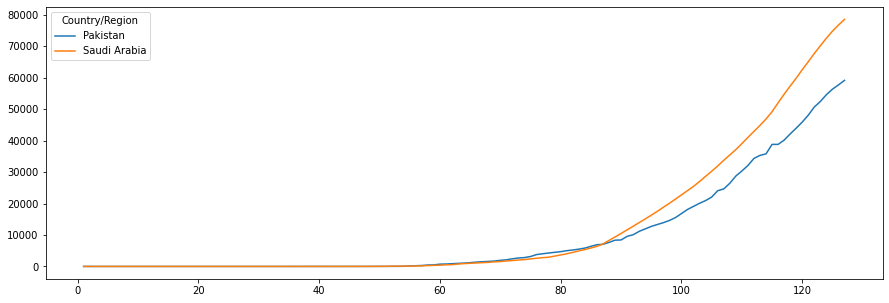

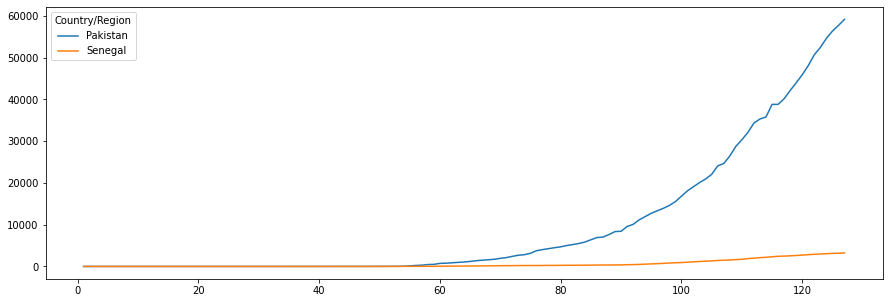

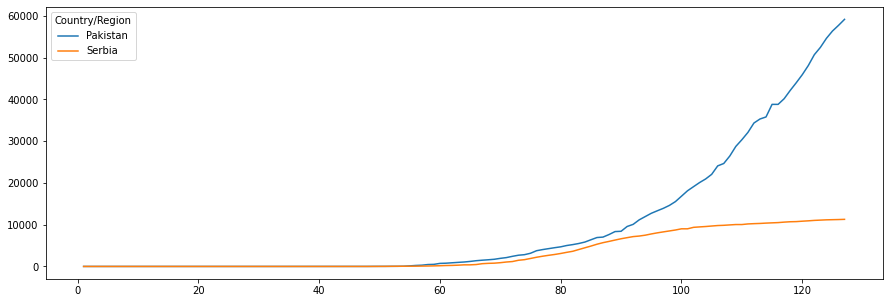

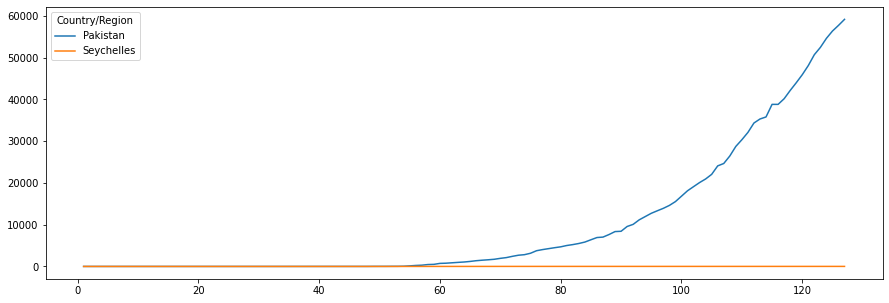

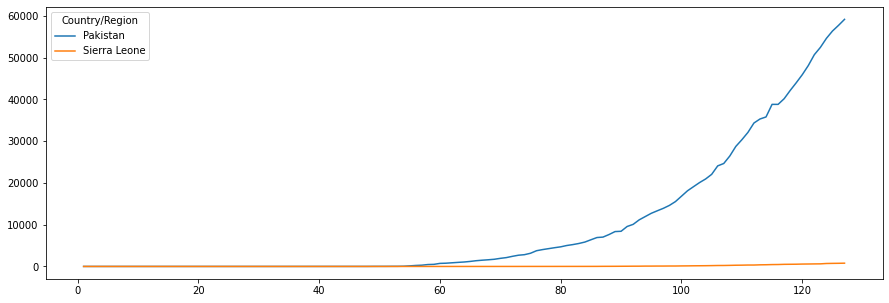

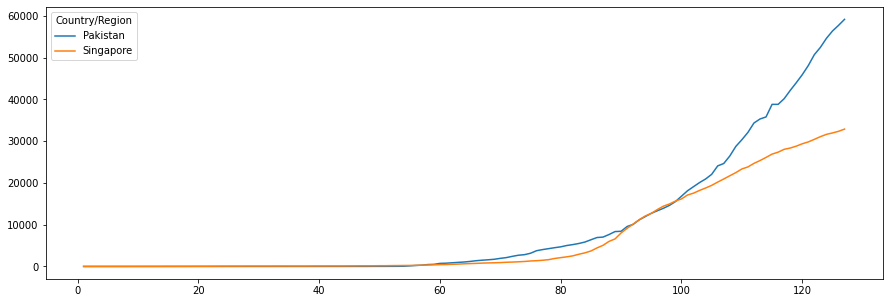

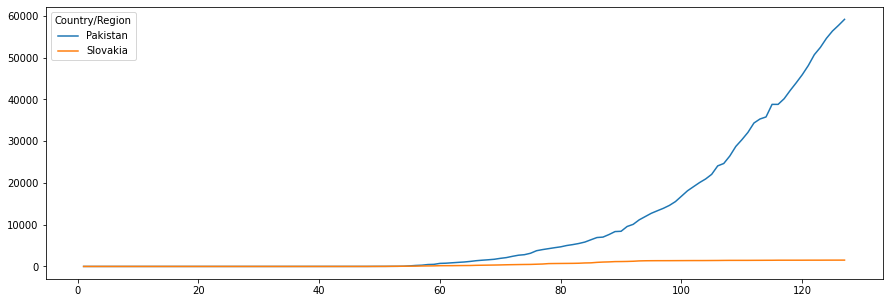

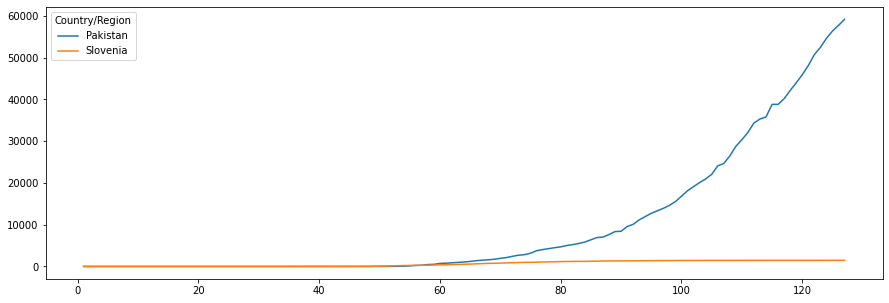

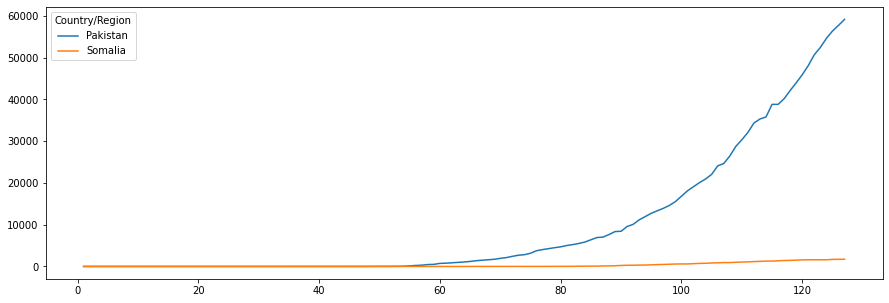

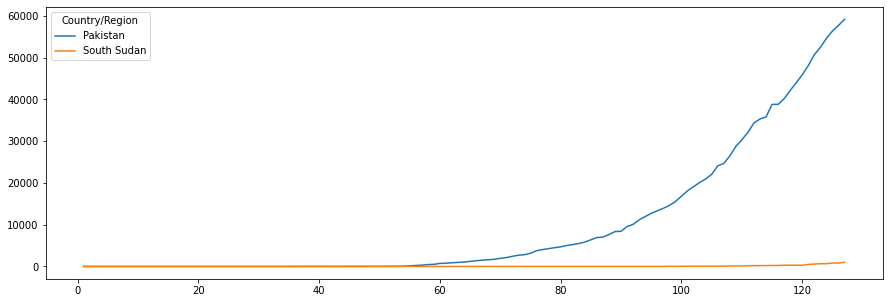

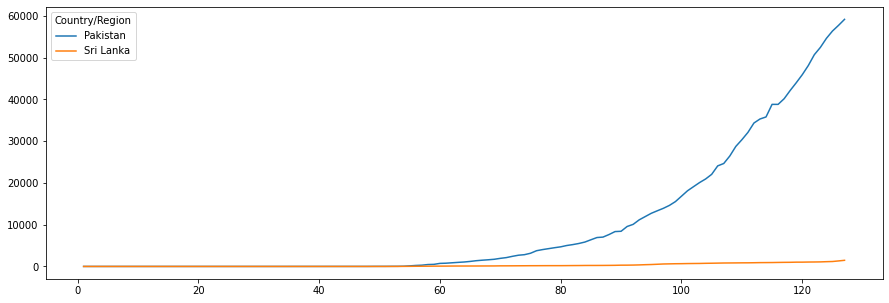

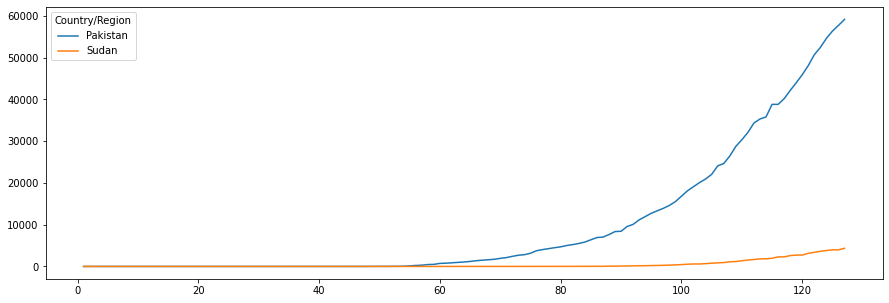

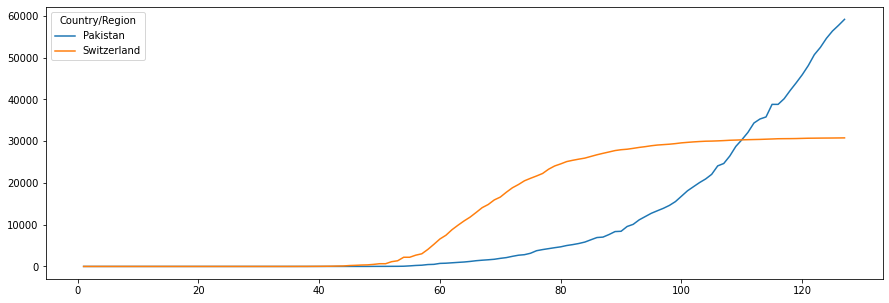

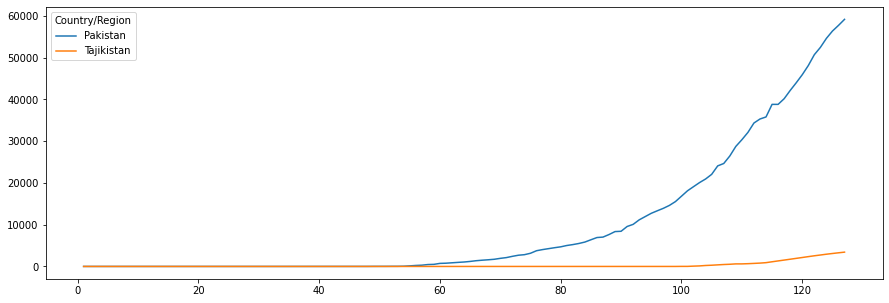

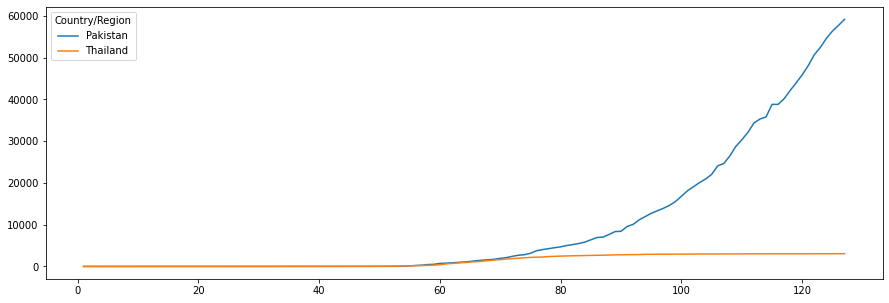

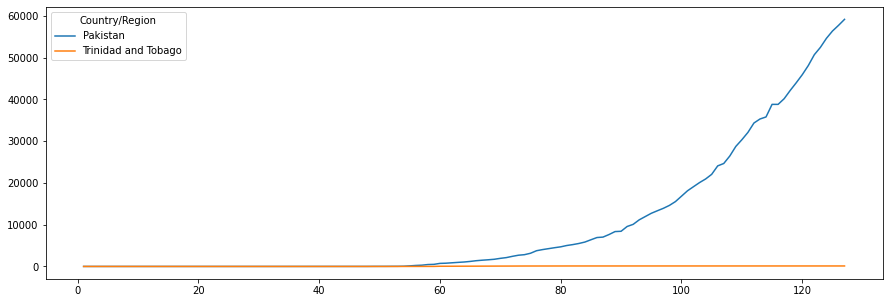

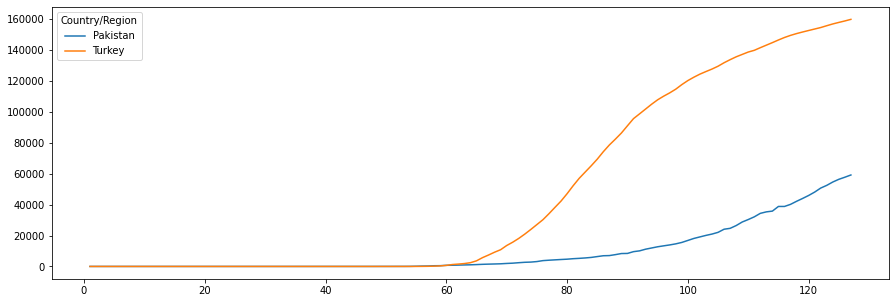

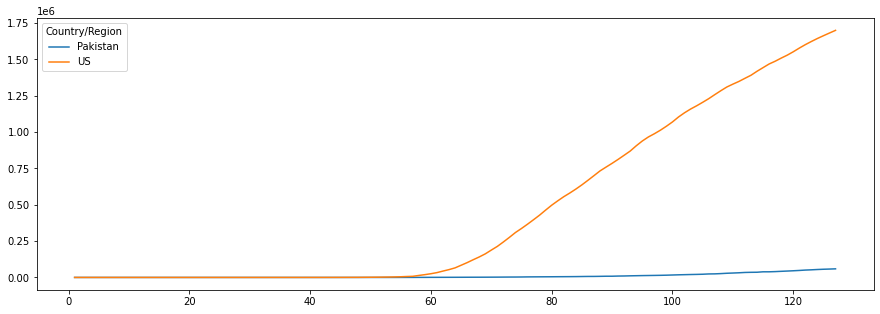

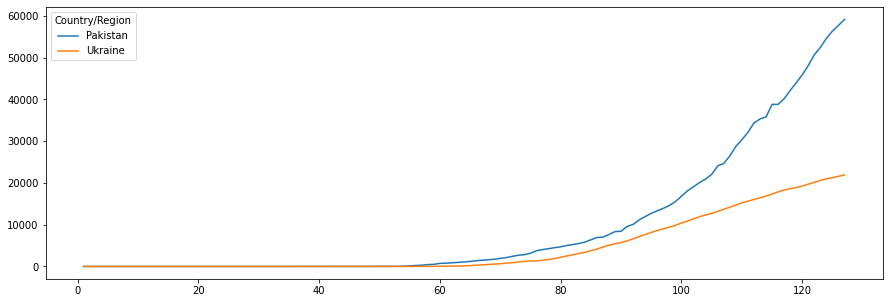

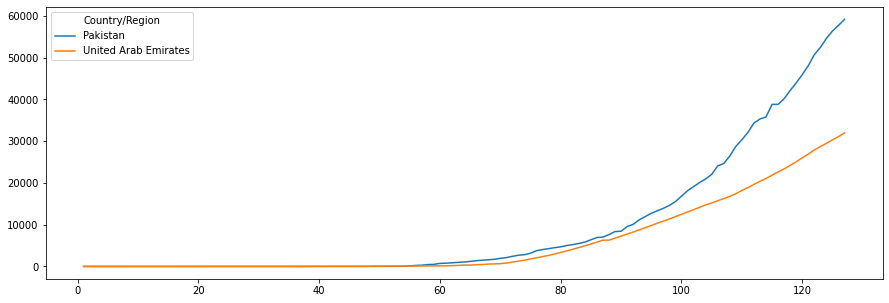

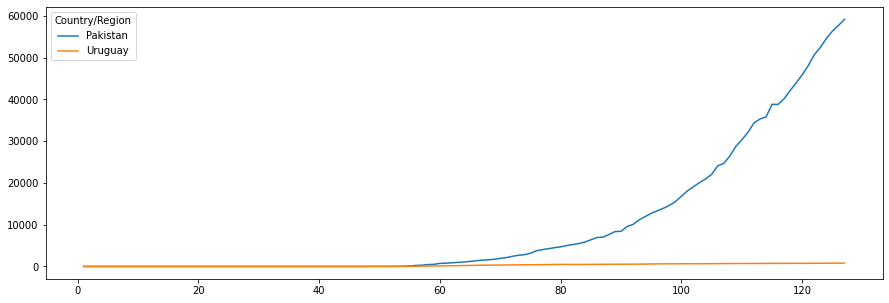

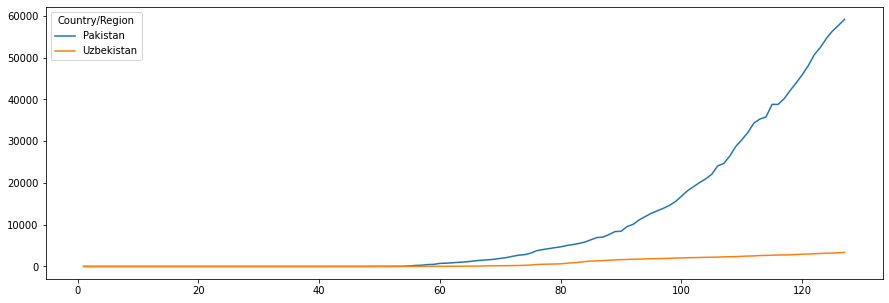

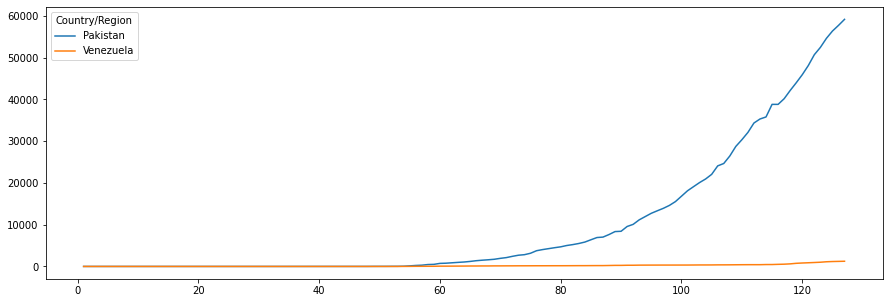

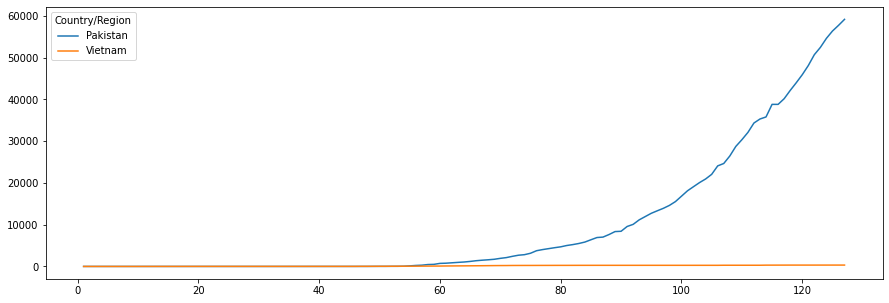

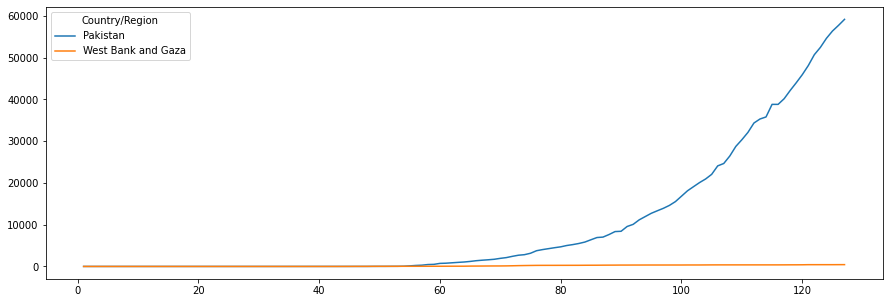

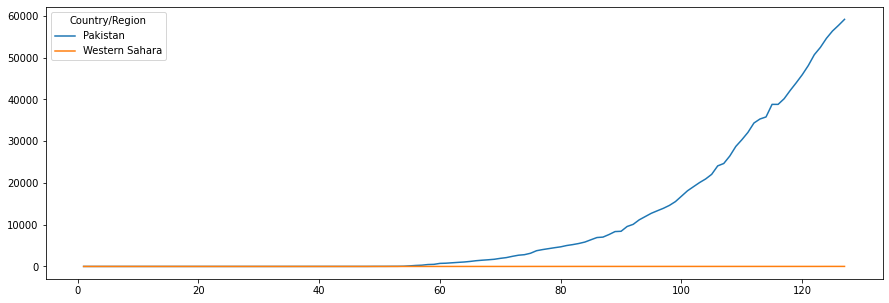

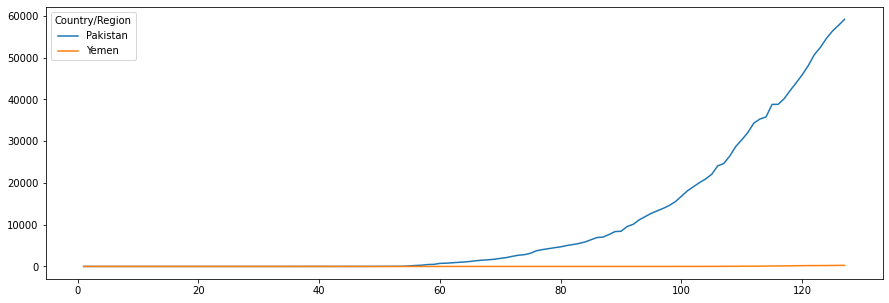

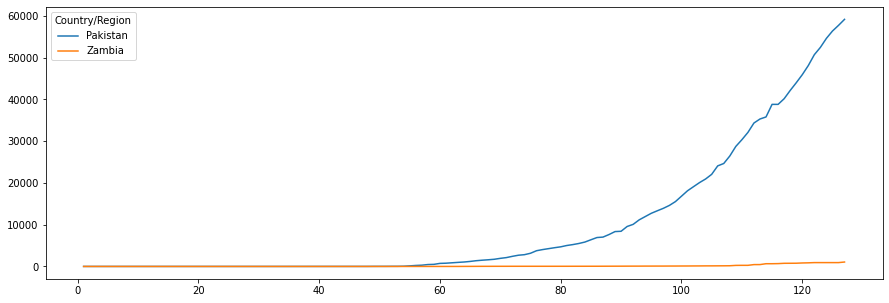

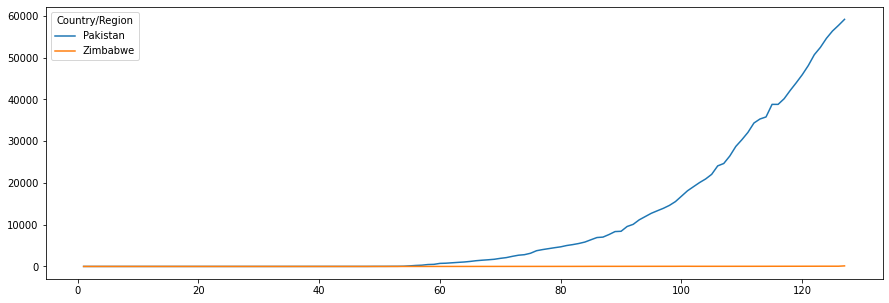

In [ ]:
#2
#Identify 5 most related countries that have a similar trend of infection as Pakistan

for i in range(len(data)):
  pak = data.iloc[130:131,:]
  pak = pak.append(data.iloc[i:i+1,:])
  pak.T.plot(figsize=(15,5))

Text(0, 0.5, 'Number of Cases')

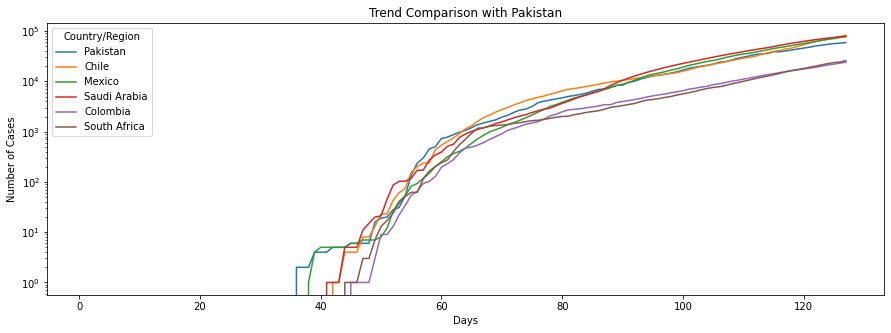

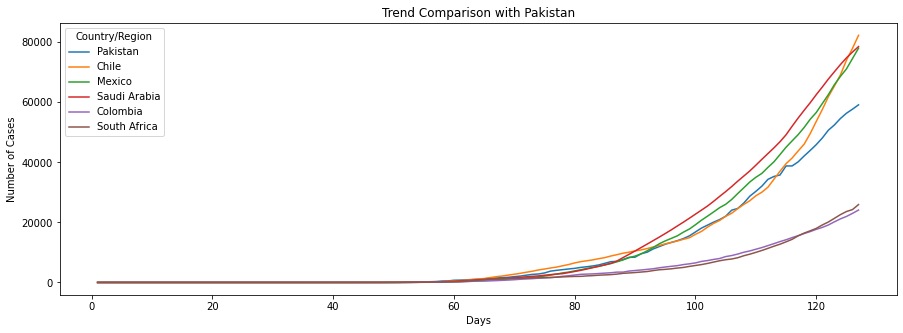

In [ ]:
#After inspecting the grpahs above, these seems like countries having trend as pakistan
#Conforming this by plotting them using two different graph scales
trend = data.iloc[130:131,:]
trend = trend.append(data.iloc[35:36,:])
trend = trend.append(data.iloc[113:114,:])
trend = trend.append(data.iloc[147:148,:])
trend = trend.append(data.iloc[37:38,:])
trend = trend.append(data.iloc[156:157,:])

fig = trend.T.plot(logy=True,figsize=(15,5), title="Trend Comparison with Pakistan")
fig.set_xlabel("Days")
fig.set_ylabel("Number of Cases")

fig = trend.T.plot(figsize=(15,5), title="Trend Comparison with Pakistan")
fig.set_xlabel("Days")
fig.set_ylabel("Number of Cases")

AFTER LOOKING THROUGH GRAPHS THE COUNTRIES HAVING SIMILAR TREND AS PAKISTAN ARE:

*   Chile
*   Mexico
*   Saudi Arabia
*   Colombia
*   South Africa





In [ ]:
#3-5
#Extracting and preparing the data of these countries
data = pd.read_csv("time_series_covid_19_confirmed.csv")
data = data.drop(['Lat','Long','Province/State'], axis=1)
data = data.iloc[:, :-8]

chile = data.loc[(data["Country/Region"]=="Chile")]
mexico = data.loc[(data["Country/Region"]=="Mexico")]
saudia = data.loc[(data["Country/Region"]=="Saudi Arabia")]
colombia = data.loc[(data["Country/Region"]=="Colombia")]
africa = data.loc[(data["Country/Region"]=="South Africa")]
print(chile)
print(mexico)
print(saudia)
print(colombia)
print(africa)

   Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
48          Chile        0        0  ...    73997    77961    82289

[1 rows x 128 columns]
    Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
158         Mexico        0        0  ...    71105    74560    78023

[1 rows x 128 columns]
    Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
192   Saudi Arabia        0        0  ...    74795    76726    78541

[1 rows x 128 columns]
   Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
82       Colombia        0        0  ...    21981    23003    24104

[1 rows x 128 columns]
    Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
200   South Africa        0        0  ...    23615    24264    25937

[1 rows x 128 columns]


In [ ]:
#Dropping the column with country name
chile = chile.iloc[:,1:]
mexico = mexico.iloc[:,1:]
saudia = saudia.iloc[:,1:]
colombia = colombia.iloc[:,1:]
africa = africa.iloc[:,1:]

In [ ]:
#Changing the dates to datetime index column
chile = chile.sum(axis=0)
chile.index = pd.to_datetime(chile.index)

mexico = mexico.sum(axis=0)
mexico.index = pd.to_datetime(mexico.index)

saudia = saudia.sum(axis=0)
saudia.index = pd.to_datetime(saudia.index)

colombia = colombia.sum(axis=0)
colombia.index = pd.to_datetime(colombia.index)

africa = africa.sum(axis=0)
africa.index = pd.to_datetime(africa.index)

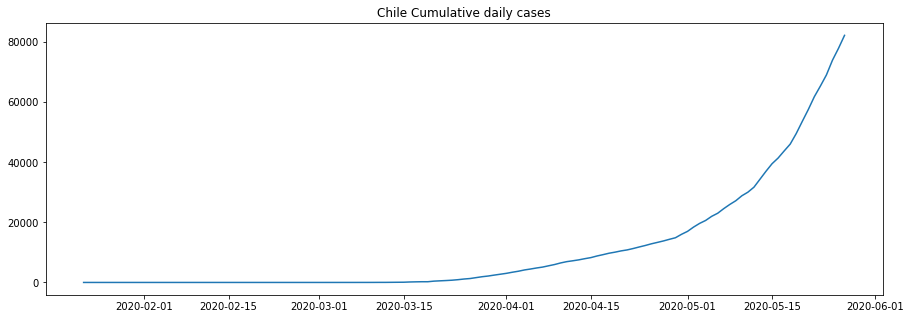

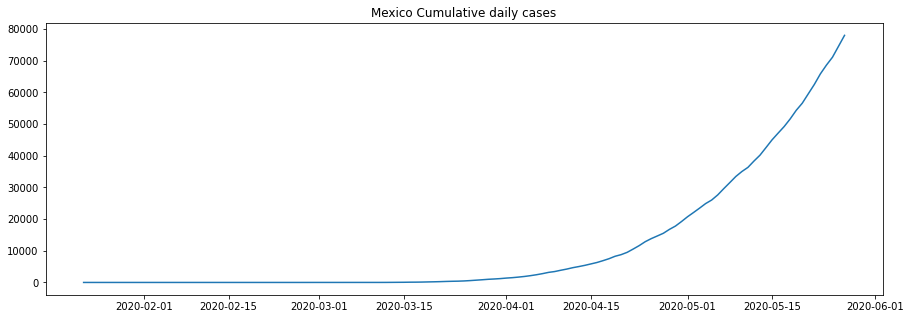

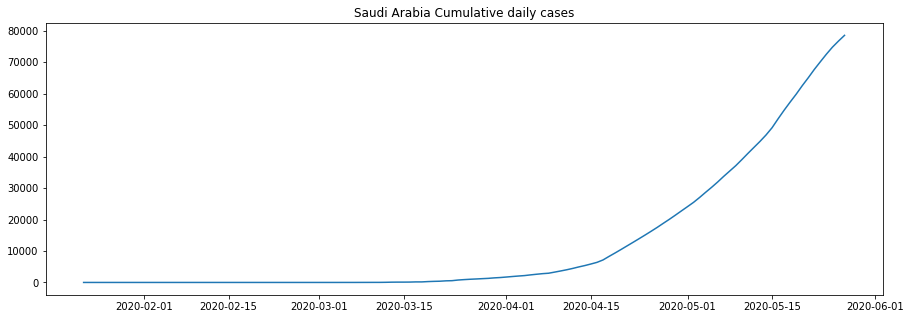

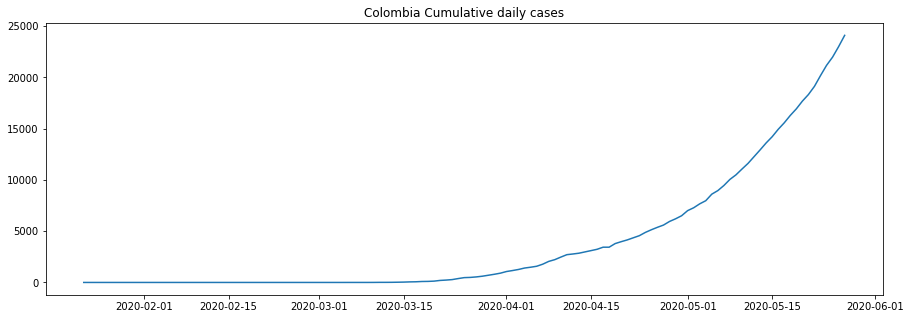

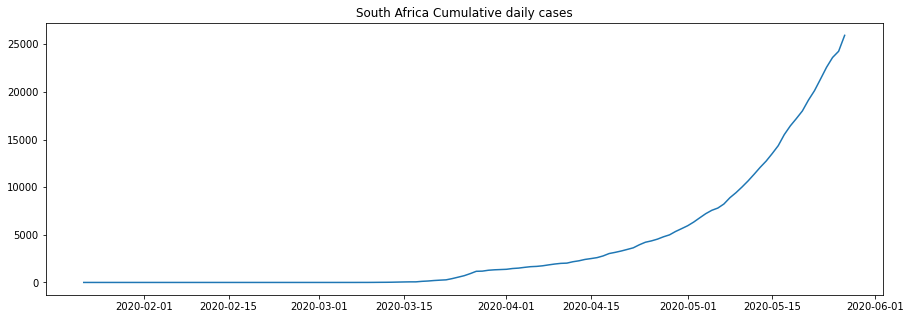

In [ ]:
#Plotting the graph of these countries
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(chile)
plt.title("Chile Cumulative daily cases");

plt.figure(figsize=(15,5))
plt.plot(mexico)
plt.title("Mexico Cumulative daily cases");

plt.figure(figsize=(15,5))
plt.plot(saudia)
plt.title("Saudi Arabia Cumulative daily cases");

plt.figure(figsize=(15,5))
plt.plot(colombia)
plt.title("Colombia Cumulative daily cases");

plt.figure(figsize=(15,5))
plt.plot(africa)
plt.title("South Africa Cumulative daily cases");

In [ ]:
#6-7
#First using trend of pakistan to predict pakistan future cases
pak = data.loc[(data["Country/Region"]=="Pakistan")]
pak

Country/Region  1/22/20  1/23/20  ...  5/25/20  5/26/20  5/27/20
177       Pakistan        0        0  ...    56349    57705    59151

[1 rows x 128 columns]

In [ ]:
#Droping first column with country name
pak = pak.iloc[:,1:]
pak

1/22/20  1/23/20  1/24/20  1/25/20  ...  5/24/20  5/25/20  5/26/20  5/27/20
177        0        0        0        0  ...    54601    56349    57705    59151

[1 rows x 127 columns]

In [ ]:
#Changing the dates to datetime index column
pak = pak.sum(axis=0)
pak.index = pd.to_datetime(pak.index)
pak.head()
pak

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-05-23    52437
2020-05-24    54601
2020-05-25    56349
2020-05-26    57705
2020-05-27    59151
Length: 127, dtype: int64

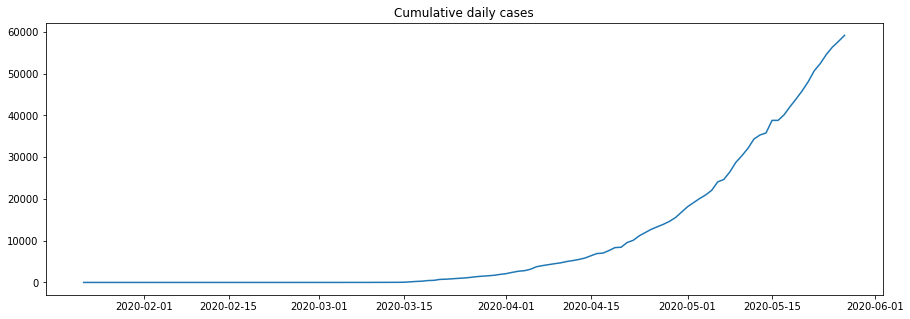

In [ ]:
#Plotting pakistan cases trend
plt.figure(figsize=(15,5))
plt.plot(pak)
plt.title("Cumulative daily cases");

In [ ]:
#Separating daily new cases of Pakistan
import numpy as np

diff_pak = pak.diff().fillna(pak[0]).astype(np.int64)
print(diff_pak)

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-05-23    1743
2020-05-24    2164
2020-05-25    1748
2020-05-26    1356
2020-05-27    1446
Length: 127, dtype: int64


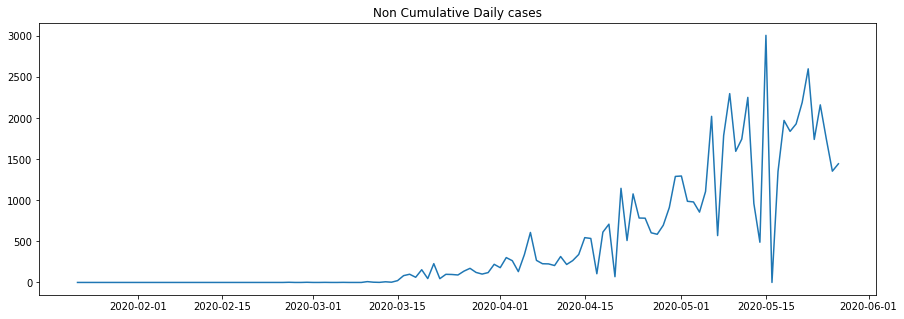

In [ ]:
#plotting graph of daily new cases
plt.figure(figsize=(15,5))
plt.plot(diff_pak)
plt.title("Non Cumulative Daily cases");

In [ ]:
#USING ARIMA MODEL TO TRAIN AND PREDICT CORONA VIRUS CASES 

# Import the library 
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to Pakistan data
stepwise_fit = auto_arima(pak, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore',suppress_warnings = True,stepwise = True) 
 
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1658.039, BIC=1671.675, Time=1.487 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1773.599, BIC=1779.053, Time=0.029 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1684.248, BIC=1695.158, Time=1.804 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1658.812, BIC=1669.721, Time=1.186 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1771.657, BIC=1774.385, Time=0.037 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=1691.959, BIC=1702.868, Time=0.418 seconds
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=1656.656, BIC=1673.021, Time=2.559 seconds
Fit ARIMA(1,2,1)x(1,1,0,12) [intercept=True]; AIC=1656.689, BIC=1670.326, Time=2.227 seconds
Fit ARIMA(1,2,1)x(2,1,1,12) [intercept=True]; AIC=1665.898, BIC=1684.990, Time=6.347 seconds
Fit ARIMA(1,2,1)x(1,1,2,12) [intercept=True]; AIC=1658.575, BIC=1677.666, Time=5.644 seconds
Fit ARIMA(1,2,1)x(0,1,2,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  127
Model:             SARIMAX(0, 2, 1)x(1, 1, [], 12)   Log Likelihood                -823.535
Date:                             Sat, 06 Jun 2020   AIC                           1655.071
Time:                                     14:25:22   BIC                           1665.980
Sample:                                          0   HQIC                          1659.498
                                             - 127                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5763      5.252      1.442      0.149      -2.718      17.871
ma.L1         -0.8900      0.040    -22.450      0.000      -0.968      -0.812
ar.S.L12      -0.6951      0.065    -10.680      0.000      -0.823      -0.568
sigma2       1.18e+05   9367.732     12.600      0.000    9.97e+04    1.36e+05
===================================================================================
Ljung-Box (Q):                       56.63   Jarque-Bera (JB):               150.40
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):             204.28   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets
from statsmodels.tsa.statespace.sarimax import SARIMAX 

train = pak.iloc[:len(pak)-12] 
test = pak.iloc[len(pak)-12:]
  
# Fit a SARIMAX on the training set 
model = SARIMAX(train, order = (0, 2, 1), seasonal_order =(1, 1, [], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(0, 2, 1)x(1, 1, [], 12)   Log Likelihood                -719.496
Date:                             Sat, 06 Jun 2020   AIC                           1444.993
Time:                                     14:25:28   BIC                           1452.838
Sample:                                 01-22-2020   HQIC                          1448.169
                                      - 05-15-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8036      0.035    -22.905      0.000      -0.872      -0.735
ar.S.L12      -0.7440      0.092     -8.061      0.000      -0.925      -0.563
sigma2      8.342e+04   7191.433     11.600      0.000    6.93e+04    9.75e+04
===================================================================================
Ljung-Box (Q):                       45.12   Jarque-Bera (JB):               152.76
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):          789910.49   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

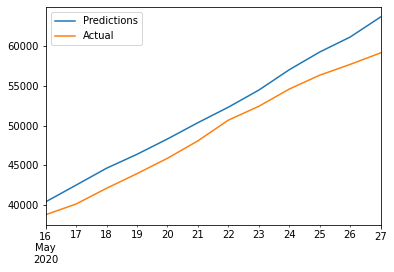

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
#Predictions
pak_predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values 
pak_predictions.plot(legend = True) 
test.plot(legend = True)
L = plt.legend()
L.get_texts()[1].set_text('Actual')

2020-05-09     27762.338152
2020-05-10     30227.803211
2020-05-11     31659.316846
2020-05-12     33919.533486
2020-05-13     36256.195584
2020-05-14     36582.615626
2020-05-15     37601.864116
2020-05-16     40389.458094
2020-05-17     40547.732807
2020-05-18     41853.595166
2020-05-19     43535.555834
2020-05-20     45638.391799
2020-05-21     47753.456636
2020-05-22     49903.681090
2020-05-23     52745.745364
2020-05-24     54864.888992
2020-05-25     56696.090931
2020-05-26     57990.406066
2020-05-27     60046.323575
2020-05-28     60460.467856
2020-05-29     62327.393778
2020-05-30     64864.277404
2020-05-31     66471.846701
2020-06-01     68828.603485
2020-06-02     71559.468872
2020-06-03     73969.003542
2020-06-04     76298.855171
2020-06-05     79097.322474
2020-06-06     80999.454710
2020-06-07     82472.424067
2020-06-08     85522.842921
2020-06-09     86662.856733
2020-06-10     88806.438941
2020-06-11     91626.254947
2020-06-12     93932.264477
2020-06-13     96649

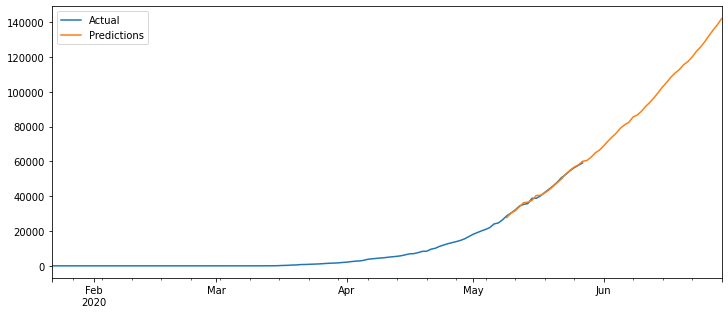

In [ ]:
# Train the model on the complete dataset 
model = model = SARIMAX(pak, order = (0, 2, 1),  seasonal_order =(2, 1, [], 12)) 
result = model.fit() 
  
#Predictions
pak_predictions = result.predict(start = len(pak)-19,  end = (len(pak)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
print(pak_predictions)
plt.rcParams['axes.facecolor'] = 'w'
# Plot the  pakisatn predictions values 
pak.plot(figsize = (12, 5)) 
pak_predictions.plot(legend = True) 
L = plt.legend()
L.get_texts()[0].set_text('Actual')

In [ ]:
#Extracting daily new cases. Below we have dates and new cases on that specific date from 2020-05-10 to 2020-06-29
diff_predictions = pak_predictions.diff().fillna(pak_predictions[0]).astype(np.int64)
diff_predictions = diff_predictions[1:]
print(diff_predictions)

2020-05-10    2465
2020-05-11    1431
2020-05-12    2260
2020-05-13    2336
2020-05-14     326
2020-05-15    1019
2020-05-16    2787
2020-05-17     158
2020-05-18    1305
2020-05-19    1681
2020-05-20    2102
2020-05-21    2115
2020-05-22    2150
2020-05-23    2842
2020-05-24    2119
2020-05-25    1831
2020-05-26    1294
2020-05-27    2055
2020-05-28     414
2020-05-29    1866
2020-05-30    2536
2020-05-31    1607
2020-06-01    2356
2020-06-02    2730
2020-06-03    2409
2020-06-04    2329
2020-06-05    2798
2020-06-06    1902
2020-06-07    1472
2020-06-08    3050
2020-06-09    1140
2020-06-10    2143
2020-06-11    2819
2020-06-12    2306
2020-06-13    2717
2020-06-14    3041
2020-06-15    3116
2020-06-16    2587
2020-06-17    3032
2020-06-18    2375
2020-06-19    1962
2020-06-20    2759
2020-06-21    1783
2020-06-22    2562
2020-06-23    3227
2020-06-24    2512
2020-06-25    3085
2020-06-26    3431
2020-06-27    3310
2020-06-28    3010
2020-06-29    3466
Freq: D, Name: Predictions, dty

In [ ]:
#Difference between actual values and predicted values using above ARIMA Model from 2020-05-10 to 2020-05-27
abs(pak_predictions[:19] - pak[108:]).astype(np.int64)

2020-05-09     973
2020-05-10     106
2020-05-11     421
2020-05-12     416
2020-05-13     958
2020-05-14     794
2020-05-15    1197
2020-05-16    1590
2020-05-17     396
2020-05-18     271
2020-05-19     430
2020-05-20     259
2020-05-21     337
2020-05-22     790
2020-05-23     308
2020-05-24     263
2020-05-25     347
2020-05-26     285
2020-05-27     895
Freq: D, dtype: int64

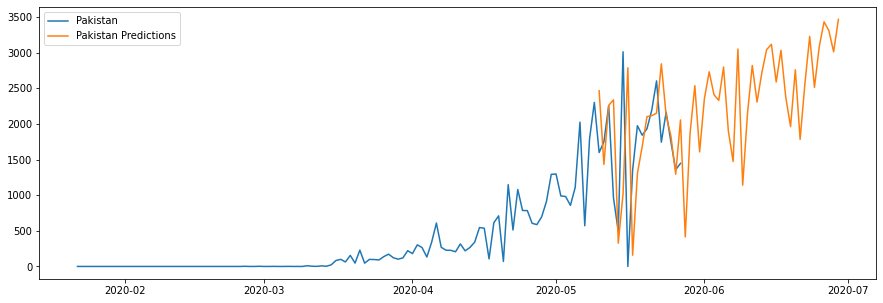

In [ ]:
# Plot the non Cummulative pakistan actual and predictions values 
plt.figure(figsize=(15,5))
plt.plot(diff_pak,label='Pakistan')
plt.plot(diff_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#3-5
#CHILE

#Fit auto_arima function to Chile data
stepwise_fit = auto_arima(chile, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)        
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1549.173, BIC=1562.810, Time=0.981 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1550.998, BIC=1556.453, Time=0.029 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1548.151, BIC=1559.061, Time=0.725 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1547.357, BIC=1558.267, Time=1.003 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1549.568, BIC=1552.295, Time=0.027 seconds
Fit ARIMA(0,2,1)x(0,1,0,12) [intercept=True]; AIC=1547.933, BIC=1556.115, Time=0.174 seconds
Fit ARIMA(0,2,1)x(1,1,1,12) [intercept=True]; AIC=1547.313, BIC=1560.949, Time=1.624 seconds
Fit ARIMA(0,2,1)x(1,1,0,12) [intercept=True]; AIC=1548.448, BIC=1559.358, Time=0.588 seconds
Fit ARIMA(0,2,1)x(2,1,1,12) [intercept=True]; AIC=1545.972, BIC=1562.336, Time=3.146 seconds
Fit ARIMA(0,2,1)x(2,1,0,12) [intercept=True]; AIC=1544.013, BIC=1557.650, Time=1.965 seconds
Fit ARIMA(0,2,0)x(2,1,0,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  127
Model:             SARIMAX(3, 2, 3)x(2, 1, [], 12)   Log Likelihood                -758.858
Date:                             Sat, 06 Jun 2020   AIC                           1537.716
Time:                                     09:42:10   BIC                           1564.989
Sample:                                          0   HQIC                          1548.783
                                             - 127                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.8739     18.981      1.363      0.173     -11.328      63.076
ar.L1         -0.9235      0.146     -6.322      0.000      -1.210      -0.637
ar.L2          0.1772      0.221      0.802      0.423      -0.256       0.610
ar.L3          0.6460      0.163      3.970      0.000       0.327       0.965
ma.L1          0.8848      3.848      0.230      0.818      -6.657       8.426
ma.L2         -0.5268      1.043     -0.505      0.613      -2.570       1.517
ma.L3         -0.8694      3.826     -0.227      0.820      -8.369       6.630
ar.S.L12       0.1150      0.157      0.732      0.464      -0.193       0.423
ar.S.L24      -0.3113      0.287     -1.084      0.279      -0.874       0.252
sigma2      3.782e+04   1.65e+05      0.229      0.819   -2.86e+05    3.62e+05
===================================================================================
Ljung-Box (Q):                       34.82   Jarque-Bera (JB):               325.25
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              69.21   Skew:                             2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets 
train = chile.iloc[:len(chile)-12] 
test = chile.iloc[len(chile)-12:]
  
#Fit a SARIMAX on the training set 
model = SARIMAX(train, order = (3, 2, 3), seasonal_order =(2, 1, [], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(3, 2, 3)x(2, 1, [], 12)   Log Likelihood                -645.435
Date:                             Sat, 06 Jun 2020   AIC                           1308.869
Time:                                     13:55:57   BIC                           1332.405
Sample:                                 01-22-2020   HQIC                          1318.397
                                      - 05-15-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0357      0.598     -1.733      0.083      -2.207       0.136
ar.L2         -0.4298      0.711     -0.604      0.546      -1.824       0.964
ar.L3          0.3671      0.509      0.721      0.471      -0.631       1.365
ma.L1          0.6597      0.644      1.025      0.305      -0.602       1.921
ma.L2         -0.0881      0.520     -0.169      0.866      -1.108       0.932
ma.L3         -0.4301      0.338     -1.273      0.203      -1.092       0.232
ar.S.L12       0.0012      0.135      0.009      0.993      -0.262       0.265
ar.S.L24      -0.2163      0.361     -0.599      0.549      -0.924       0.491
sigma2      2.039e+04   1972.157     10.338      0.000    1.65e+04    2.43e+04
===================================================================================
Ljung-Box (Q):                       40.43   Jarque-Bera (JB):               664.10
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):           76169.48   Skew:                             2.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

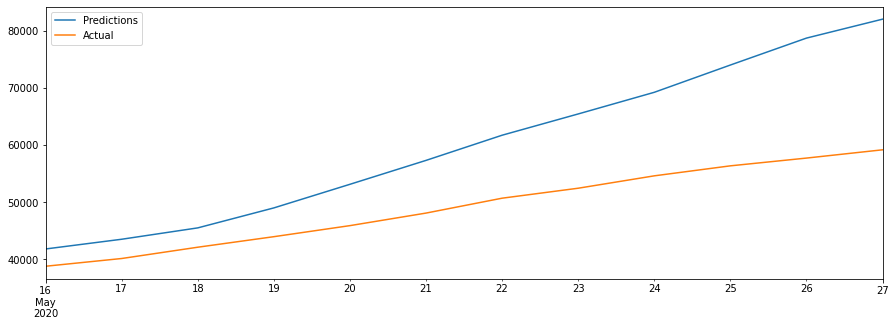

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
Cpredictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values of Chile
plt.figure(figsize=(15,5))
Cpredictions.plot(legend = True) 
test.plot(legend = True)
L=plt.legend()
L.get_texts()[1].set_text('Actual') 

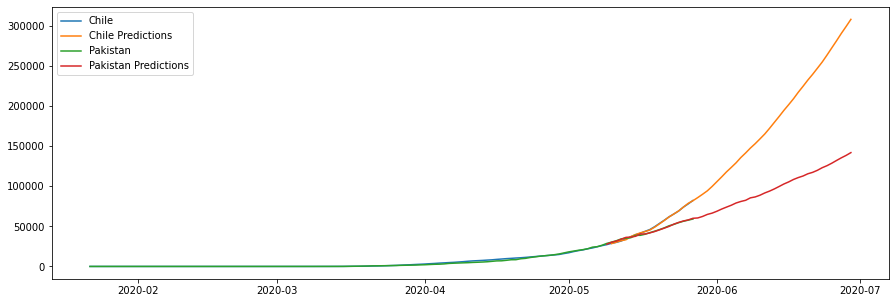

In [ ]:
#Train the model on the complete dataset 
model = model = SARIMAX(chile, order = (3, 2, 3), seasonal_order =(2, 1, [], 12)) 
result = model.fit() 

#Prediction
Cpredictions = result.predict(start = len(chile)-18,  end = (len(chile)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
#Plot the actual and predicted values of Chile and Pakistan to compare their trends
#The data is plotted till 2020-06-29
plt.figure(figsize=(15,5))
plt.plot(chile,label='Chile')
plt.plot(Cpredictions,label='Chile Predictions')  
plt.plot(pak,label='Pakistan') 
plt.plot(pak_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#Predictions using chile data
Cpredictions = Cpredictions.diff()
print(Cpredictions[1:])

2020-05-11    1819.870008
2020-05-12    1805.937362
2020-05-13    1207.853769
2020-05-14    3812.803371
2020-05-15    2668.531832
2020-05-16    2017.093749
2020-05-17    1699.604628
2020-05-18    1986.733128
2020-05-19    3491.445402
2020-05-20    4126.454066
2020-05-21    4179.689636
2020-05-22    4399.628632
2020-05-23    3717.577802
2020-05-24    3783.211818
2020-05-25    4768.426594
2020-05-26    4706.339307
2020-05-27    3309.798168
2020-05-28    3886.877839
2020-05-29    4115.048811
2020-05-30    4295.195974
2020-05-31    5456.383540
2020-06-01    5975.714386
2020-06-02    5951.067648
2020-06-03    6215.864980
2020-06-04    5570.077698
2020-06-05    5726.409500
2020-06-06    6605.585659
2020-06-07    5695.048497
2020-06-08    6120.635656
2020-06-09    5459.720232
2020-06-10    5970.314489
2020-06-11    6107.553266
2020-06-12    7062.589515
2020-06-13    7405.077712
2020-06-14    7365.558029
2020-06-15    7647.221366
2020-06-16    7091.546579
2020-06-17    7324.819418
2020-06-18  

In [ ]:
#MEXICO

#Fit auto_arima function to mexico data
stepwise_fit = auto_arima(mexico, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)        
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1513.501, BIC=1527.138, Time=1.563 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1552.666, BIC=1558.121, Time=0.028 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1547.056, BIC=1557.965, Time=0.876 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1516.550, BIC=1527.459, Time=1.460 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1550.844, BIC=1553.571, Time=0.034 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=1524.010, BIC=1534.920, Time=0.479 seconds
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=1512.311, BIC=1528.676, Time=2.440 seconds
Near non-invertible roots for order (1, 2, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(1,2,1)x(0,1,2,12) [intercept=True]; AIC=1511.451, BIC=1527.816, Time=4.634 seconds
Near non-invertible roots for order (1, 2, 1)(0, 1, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  127
Model:             SARIMAX(3, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -739.136
Date:                              Sat, 06 Jun 2020   AIC                           1494.272
Time:                                      09:52:30   BIC                           1516.091
Sample:                                           0   HQIC                          1503.126
                                              - 127                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.9126      9.144      1.193      0.233      -7.010      28.835
ar.L1          0.8187      0.094      8.674      0.000       0.634       1.004
ar.L2         -0.3969      0.119     -3.344      0.001      -0.629      -0.164
ar.L3         -0.4108      0.100     -4.105      0.000      -0.607      -0.215
ma.L1         -1.6123      0.577     -2.794      0.005      -2.743      -0.481
ma.L2          0.9974      0.718      1.389      0.165      -0.410       2.405
ma.S.L12      -0.1400      0.178     -0.786      0.432      -0.489       0.209
sigma2      3.508e+04   2.43e+04      1.445      0.149   -1.25e+04    8.27e+04
===================================================================================
Ljung-Box (Q):                       56.71   Jarque-Bera (JB):                67.50
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):              71.75   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets 
train = mexico.iloc[:len(mexico)-12] 
test = mexico.iloc[len(mexico)-12:]
  
#Fit a SARIMAX on the training set   
model = SARIMAX(train, order = (3, 2, 2), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  115
Model:             SARIMAX(3, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -621.680
Date:                              Sat, 06 Jun 2020   AIC                           1257.360
Time:                                      11:37:44   BIC                           1275.666
Sample:                                  01-22-2020   HQIC                          1264.770
                                       - 05-15-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8900      0.068     13.066      0.000       0.756       1.023
ar.L2         -0.4565      0.093     -4.920      0.000      -0.638      -0.275
ar.L3         -0.3669      0.067     -5.512      0.000      -0.497      -0.236
ma.L1         -1.6272     16.885     -0.096      0.923     -34.722      31.467
ma.L2          0.9999     20.744      0.048      0.962     -39.658      41.658
ma.S.L12      -0.2075      0.142     -1.464      0.143      -0.485       0.070
sigma2      1.171e+04   2.43e+05      0.048      0.962   -4.65e+05    4.88e+05
===================================================================================
Ljung-Box (Q):                       31.76   Jarque-Bera (JB):                50.48
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):           82882.71   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

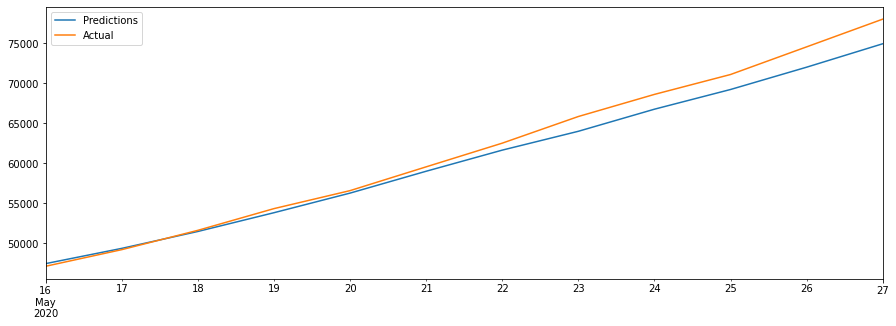

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
Mpredictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values of Mexico
plt.figure(figsize=(15,5))
Mpredictions.plot(legend = True) 
test.plot(legend = True)
L = plt.legend()
L.get_texts()[1].set_text('Actual') 

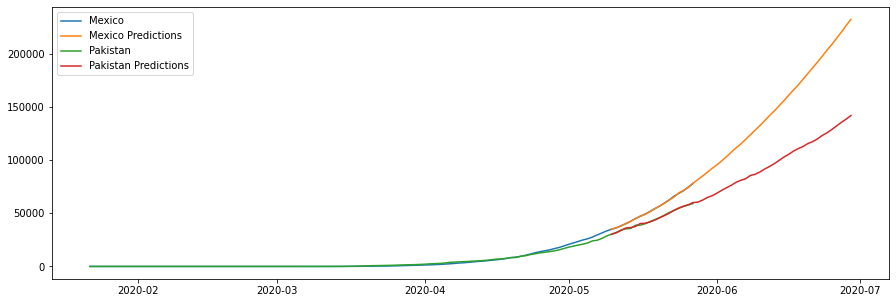

In [ ]:
#Train the model on the complete dataset 
model = model = SARIMAX(mexico, order = (3, 2, 2), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 

#Prediction
Mpredictions = result.predict(start = len(mexico)-18,  end = (len(mexico)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
#Plot the actual and predicted values of Mexico and Pakistan to compare their trends
#The data is plotted till 2020-06-29
plt.figure(figsize=(15,5))
plt.plot(mexico,label='Mexico')
plt.plot(Mpredictions,label='Mexico Predictions')  
plt.plot(pak,label='Pakistan') 
plt.plot(pak_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#Predictions using mexico data
Mpredictions = Mpredictions.diff()
print(Mpredictions[1:])

2020-05-11    1245.116022
2020-05-12    1673.954208
2020-05-13    2495.187543
2020-05-14    1829.330315
2020-05-15    2591.825031
2020-05-16    2411.270181
2020-05-17    1554.711636
2020-05-18    2419.072284
2020-05-19    2724.566162
2020-05-20    2802.933232
2020-05-21    2349.618821
2020-05-22    3061.852849
2020-05-23    2850.819385
2020-05-24    3902.295606
2020-05-25    2367.694987
2020-05-26    2797.626314
2020-05-27    3949.071572
2020-05-28    3419.612688
2020-05-29    3405.419528
2020-05-30    3579.928746
2020-05-31    3646.071944
2020-06-01    3229.509686
2020-06-02    3828.348120
2020-06-03    3929.688138
2020-06-04    4239.965469
2020-06-05    4018.058146
2020-06-06    3696.691290
2020-06-07    4344.675957
2020-06-08    4310.749794
2020-06-09    4360.237787
2020-06-10    4332.453538
2020-06-11    4638.130529
2020-06-12    4769.411514
2020-06-13    4311.238958
2020-06-14    4805.730005
2020-06-15    4820.003292
2020-06-16    5118.720319
2020-06-17    4958.930400
2020-06-18  

In [ ]:
#SAUDI ARABIA

#Fit auto_arima function to Saudia Arabia data
stepwise_fit = auto_arima(saudia, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)        
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1380.739, BIC=1394.376, Time=1.828 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1400.402, BIC=1405.857, Time=0.028 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1386.257, BIC=1397.167, Time=0.913 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1380.165, BIC=1391.075, Time=0.990 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1398.559, BIC=1401.287, Time=0.027 seconds
Fit ARIMA(0,2,1)x(0,1,0,12) [intercept=True]; AIC=1399.204, BIC=1407.387, Time=0.253 seconds
Fit ARIMA(0,2,1)x(1,1,1,12) [intercept=True]; AIC=1381.857, BIC=1395.494, Time=1.820 seconds
Fit ARIMA(0,2,1)x(0,1,2,12) [intercept=True]; AIC=1381.914, BIC=1395.551, Time=2.894 seconds
Fit ARIMA(0,2,1)x(1,1,0,12) [intercept=True]; AIC=1386.664, BIC=1397.574, Time=0.898 seconds
Fit ARIMA(0,2,1)x(1,1,2,12) [intercept=True]; AIC=1384.170, BIC=1400.534, Time=3.171 seconds
Near non-invertible roots 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  127
Model:             SARIMAX(1, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -685.844
Date:                              Sat, 06 Jun 2020   AIC                           1379.688
Time:                                      09:56:48   BIC                           1390.597
Sample:                                           0   HQIC                          1384.115
                                              - 127                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6996      3.459      0.491      0.623      -5.079       8.478
ar.L1          0.1686      0.066      2.547      0.011       0.039       0.298
ma.S.L12      -0.7589      0.126     -6.015      0.000      -1.006      -0.512
sigma2      1.001e+04    826.603     12.112      0.000    8391.462    1.16e+04
===================================================================================
Ljung-Box (Q):                       39.96   Jarque-Bera (JB):               164.14
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):            1104.01   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets 
train = saudia.iloc[:len(saudia)-12] 
test = saudia.iloc[len(saudia)-12:]
  
#Fit a SARIMAX on the training set   
model = SARIMAX(train, order = (1, 2, 0), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  115
Model:             SARIMAX(1, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -576.137
Date:                              Sat, 06 Jun 2020   AIC                           1158.274
Time:                                      12:38:17   BIC                           1166.119
Sample:                                  01-22-2020   HQIC                          1161.450
                                       - 05-15-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0568      0.085      0.668      0.504      -0.110       0.224
ma.S.L12      -0.6480      0.084     -7.725      0.000      -0.812      -0.484
sigma2      4947.7231    423.288     11.689      0.000    4118.094    5777.353
===================================================================================
Ljung-Box (Q):                       38.53   Jarque-Bera (JB):               332.46
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):            5033.95   Skew:                             2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

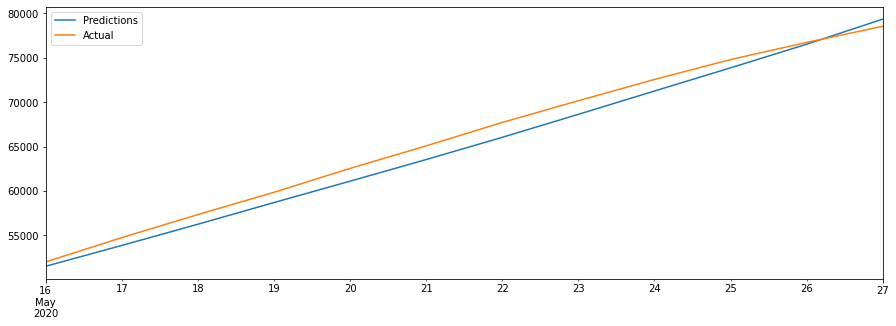

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
Spredictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values of saudia
plt.figure(figsize=(15,5))
Spredictions.plot(legend = True) 
test.plot(legend = True)
L = plt.legend()
L.get_texts()[1].set_text('Actual') 

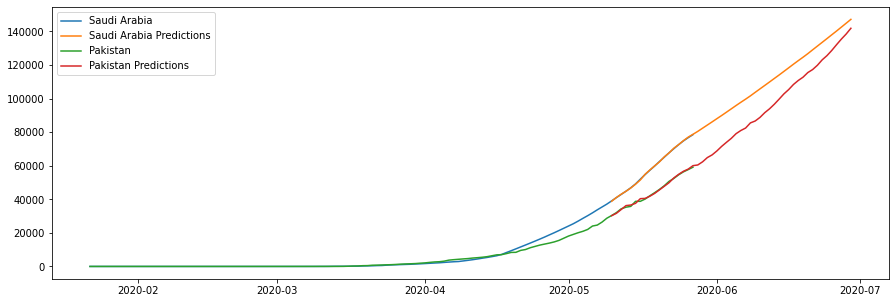

In [ ]:
#Train the model on the complete dataset 
model = model = SARIMAX(saudia, order = (1, 2, 0), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 

#Prediction
Spredictions = result.predict(start = len(saudia)-18,  end = (len(saudia)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
#Plot the actual and predicted values of Saudi Arabia and Pakistan to compare their trends
#The data is plotted till 2020-06-29 
plt.figure(figsize=(15,5))
plt.plot(saudia,label='Saudi Arabia')
plt.plot(Spredictions,label='Saudi Arabia Predictions')  
plt.plot(pak,label='Pakistan') 
plt.plot(pak_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#Predictions using saudi arabia data
Spredictions = Spredictions.diff()
print(Spredictions[1:])

2020-05-11    2269.605371
2020-05-12    1950.809932
2020-05-13    1754.497647
2020-05-14    1939.174516
2020-05-15    2283.467596
2020-05-16    2521.462374
2020-05-17    3395.944691
2020-05-18    2570.974430
2020-05-19    2440.107413
2020-05-20    2366.552105
2020-05-21    2983.498838
2020-05-22    2324.639860
2020-05-23    2832.197501
2020-05-24    2135.323794
2020-05-25    2340.260687
2020-05-26    2108.138781
2020-05-27    1695.253123
2020-05-28    1738.943380
2020-05-29    1893.506220
2020-05-30    1882.210460
2020-05-31    1890.782449
2020-06-01    1919.840622
2020-06-02    1897.675572
2020-06-03    1961.123253
2020-06-04    1970.133557
2020-06-05    1986.158105
2020-06-06    1932.763804
2020-06-07    1878.752105
2020-06-08    1948.656314
2020-06-09    2098.463866
2020-06-10    2064.879284
2020-06-11    2054.545509
2020-06-12    2063.283888
2020-06-13    2092.370841
2020-06-14    2070.210769
2020-06-15    2133.659311
2020-06-16    2142.669764
2020-06-17    2158.694338
2020-06-18  

In [ ]:
#COLOMBIA

#Fit auto_arima function to colombia dataset 
stepwise_fit = auto_arima(colombia, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)        
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1304.958, BIC=1318.595, Time=2.152 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1411.736, BIC=1417.191, Time=0.031 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1341.919, BIC=1352.829, Time=1.082 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1306.397, BIC=1317.307, Time=1.673 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1409.880, BIC=1412.607, Time=0.028 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=1335.381, BIC=1346.291, Time=0.351 seconds
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=1306.329, BIC=1322.693, Time=2.548 seconds
Near non-invertible roots for order (1, 2, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  127
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -647.007
Date:                              Sat, 06 Jun 2020   AIC                           1304.013
Time:                                      10:09:40   BIC                           1317.650
Sample:                                           0   HQIC                          1309.547
                                              - 127                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9725      0.496      5.995      0.000       2.001       3.944
ma.L1         -0.9239      0.054    -17.146      0.000      -1.029      -0.818
ma.L2          0.2144      0.069      3.092      0.002       0.079       0.350
ma.S.L12      -0.9963      4.388     -0.227      0.820      -9.597       7.604
sigma2      4279.3602   1.86e+04      0.230      0.818   -3.21e+04    4.07e+04
===================================================================================
Ljung-Box (Q):                       37.31   Jarque-Bera (JB):               103.12
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              56.11   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets 
train = colombia.iloc[:len(colombia)-12] 
test = colombia.iloc[len(colombia)-12:]
  
#Fit a SARIMAX on the training set   
model = SARIMAX(train, order = (0, 2, 2), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  115
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -565.215
Date:                              Sat, 06 Jun 2020   AIC                           1138.430
Time:                                      12:39:16   BIC                           1148.891
Sample:                                  01-22-2020   HQIC                          1142.665
                                       - 05-15-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8890      0.076    -11.659      0.000      -1.038      -0.740
ma.L2          0.2774      0.076      3.665      0.000       0.129       0.426
ma.S.L12      -0.6796      0.085     -7.973      0.000      -0.847      -0.513
sigma2      3919.8883    313.110     12.519      0.000    3306.204    4533.573
===================================================================================
Ljung-Box (Q):                       47.61   Jarque-Bera (JB):                90.80
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):          276995.90   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

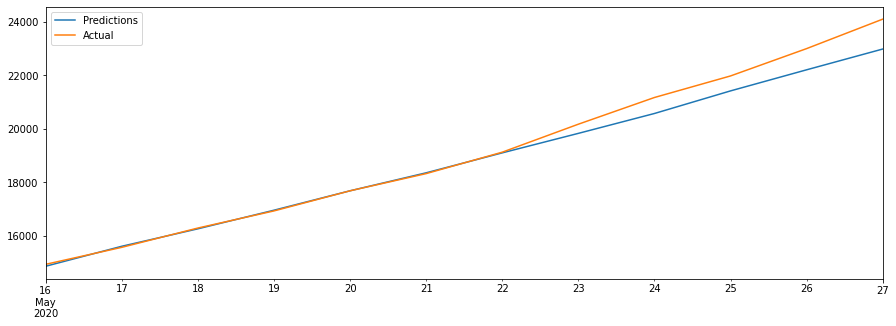

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
Copredictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values of Colombia
plt.figure(figsize=(15,5))
Copredictions.plot(legend = True) 
test.plot(legend = True)
L = plt.legend()
L.get_texts()[1].set_text('Actual')

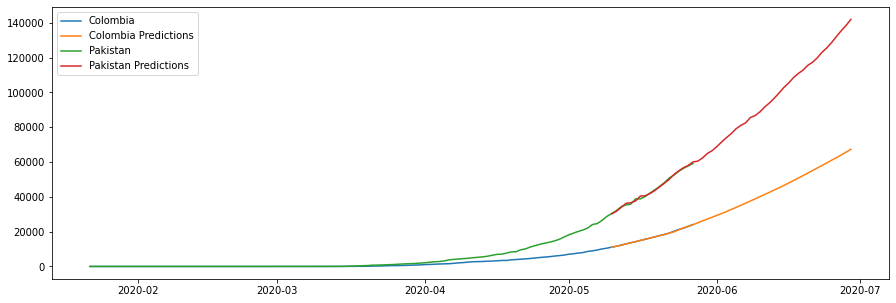

In [ ]:
#Train the model on the complete dataset 
model = model = SARIMAX(colombia, order = (0, 2, 2), seasonal_order =(0, 1, [1], 12)) 
result = model.fit() 

#Prediction
Copredictions = result.predict(start = len(colombia)-18,  end = (len(colombia)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
#Plot the actual and predicted values of Colombia and Pakistan to compare their trends
#The data is plotted till 2020-06-29
plt.figure(figsize=(15,5))
plt.plot(colombia,label='Colombia')
plt.plot(Copredictions,label='Colombia Predictions')  
plt.plot(pak,label='Pakistan') 
plt.plot(pak_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#Predictions using colombia data
Copredictions = Copredictions.diff()
print(Copredictions[1:])

2020-05-11     548.552063
2020-05-12     526.647445
2020-05-13     826.703759
2020-05-14     606.742376
2020-05-15     697.287576
2020-05-16     614.144240
2020-05-17     823.537708
2020-05-18     550.007215
2020-05-19     736.790833
2020-05-20     679.573186
2020-05-21     691.183714
2020-05-22     721.163433
2020-05-23     786.060224
2020-05-24    1111.807993
2020-05-25    1210.356573
2020-05-26     785.883375
2020-05-27     960.613395
2020-05-28    1166.093707
2020-05-29    1079.727922
2020-05-30    1042.941951
2020-05-31    1046.886921
2020-06-01    1101.829066
2020-06-02    1031.937232
2020-06-03    1130.589735
2020-06-04    1194.865191
2020-06-05    1189.205826
2020-06-06    1199.418545
2020-06-07    1227.836799
2020-06-08    1244.359629
2020-06-09    1232.649477
2020-06-10    1291.757715
2020-06-11    1254.971744
2020-06-12    1258.916714
2020-06-13    1313.858859
2020-06-14    1243.967024
2020-06-15    1342.619528
2020-06-16    1406.894984
2020-06-17    1401.235618
2020-06-18  

In [ ]:
#SOUTH AFRICA

#Fit auto_arima function to South Africa dataset
stepwise_fit = auto_arima(africa, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)        
#Print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1395.878, BIC=1409.515, Time=1.306 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1444.621, BIC=1450.075, Time=0.028 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1415.682, BIC=1426.592, Time=1.178 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1393.913, BIC=1404.823, Time=0.964 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1442.967, BIC=1445.694, Time=0.024 seconds
Fit ARIMA(0,2,1)x(0,1,0,12) [intercept=True]; AIC=1408.314, BIC=1416.497, Time=0.173 seconds
Fit ARIMA(0,2,1)x(1,1,1,12) [intercept=True]; AIC=1390.923, BIC=1404.560, Time=1.832 seconds
Fit ARIMA(0,2,1)x(1,1,0,12) [intercept=True]; AIC=1389.221, BIC=1400.131, Time=0.817 seconds
Fit ARIMA(0,2,1)x(2,1,0,12) [intercept=True]; AIC=1390.775, BIC=1404.411, Time=2.250 seconds
Fit ARIMA(0,2,1)x(2,1,1,12) [intercept=True]; AIC=1392.673, BIC=1409.038, Time=3.792 seconds
Fit ARIMA(0,2,0)x(1,1,0,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  127
Model:             SARIMAX(0, 2, 1)x(1, 1, [], 12)   Log Likelihood                -690.611
Date:                             Sat, 06 Jun 2020   AIC                           1389.221
Time:                                     10:11:03   BIC                           1400.131
Sample:                                          0   HQIC                          1393.648
                                             - 127                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7207      2.583      2.602      0.009       1.659      11.783
ma.L1         -0.7494      0.050    -14.995      0.000      -0.847      -0.651
ar.S.L12      -0.5854      0.108     -5.421      0.000      -0.797      -0.374
sigma2      1.133e+04    798.885     14.184      0.000    9765.295    1.29e+04
===================================================================================
Ljung-Box (Q):                       50.67   Jarque-Bera (JB):               472.58
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              68.92   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Split data into train and test sets 
train = africa.iloc[:len(africa)-12] 
test = africa.iloc[len(africa)-12:]
  
#Fit a SARIMAX on the training set   
model = SARIMAX(train, order = (0, 2, 1), seasonal_order =(1, 1,[], 12)) 
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(0, 2, 1)x(1, 1, [], 12)   Log Likelihood                -568.696
Date:                             Sat, 06 Jun 2020   AIC                           1143.392
Time:                                     12:42:05   BIC                           1151.238
Sample:                                 01-22-2020   HQIC                          1146.568
                                      - 05-15-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5161      0.070     -7.341      0.000      -0.654      -0.378
ar.S.L12      -0.5443      0.086     -6.346      0.000      -0.712      -0.376
sigma2      4355.6574    356.102     12.231      0.000    3657.710    5053.605
===================================================================================
Ljung-Box (Q):                       69.18   Jarque-Bera (JB):                73.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):           58693.29   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

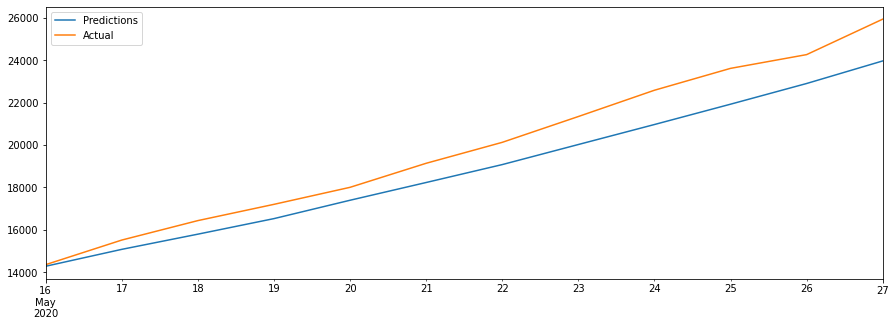

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
Apredictions = result.predict(start, end, typ = 'levels').rename("Predictions") 
  
#Plot predictions and actual values of South Africa
plt.figure(figsize=(15,5))
Apredictions.plot(legend = True) 
test.plot(legend = True)
L = plt.legend()
L.get_texts()[1].set_text('Actual')

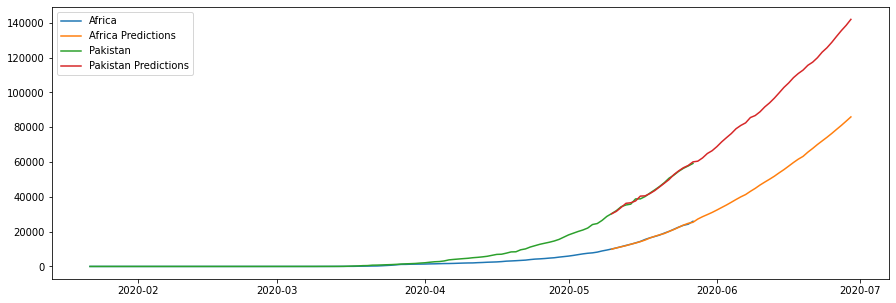

In [ ]:
#Train the model on the complete dataset 
model = model = SARIMAX(africa, order = (0, 2, 1), seasonal_order =(1, 1, [], 12)) 
result = model.fit() 

#Prediction
Apredictions = result.predict(start = len(africa)-18,  end = (len(africa)-1) + 3 * 11,  typ = 'levels').rename('Predictions') 
# Plot the actual and predicted values of South Africa and Pakistan to compare their trends
#The data is plotted till 2020-06-29
plt.figure(figsize=(15,5))
plt.plot(africa,label='Africa')
plt.plot(Apredictions,label='Africa Predictions')  
plt.plot(pak,label='Pakistan') 
plt.plot(pak_predictions, label='Pakistan Predictions')
plt.legend()  

In [ ]:
#Predictions using south africa data
Apredictions = Apredictions.diff()
print(Apredictions[1:])

2020-05-11     743.331317
2020-05-12     660.049271
2020-05-13     647.197323
2020-05-14     809.891736
2020-05-15     702.775000
2020-05-16     805.469636
2020-05-17     907.047342
2020-05-18    1184.696173
2020-05-19     954.221283
2020-05-20     866.267337
2020-05-21     729.613530
2020-05-22    1210.436990
2020-05-23    1096.821028
2020-05-24    1253.362702
2020-05-25    1292.313015
2020-05-26    1012.416401
2020-05-27     589.635124
2020-05-28    1859.770336
2020-05-29    1369.648833
2020-05-30    1198.775295
2020-05-31    1239.139345
2020-06-01    1389.731977
2020-06-02    1455.983482
2020-06-03    1431.914559
2020-06-04    1555.789363
2020-06-05    1599.804696
2020-06-06    1523.896695
2020-06-07    1323.793310
2020-06-08    1837.489175
2020-06-09    1689.842226
2020-06-10    1917.064342
2020-06-11    1706.040220
2020-06-12    1638.380082
2020-06-13    1724.285663
2020-06-14    1939.986562
2020-06-15    1847.088067
2020-06-16    2030.870090
2020-06-17    2062.457862
2020-06-18  